# Segmentación de usuarios de tarjetas de crédito por medio de Clustering

# Introducción

Este proyecto se basa en un conjunto de datos encontrado en Kaggle que contiene información detallada sobre el comportamiento de 9000 usuarios activos de tarjetas de crédito. El dataset proporciona una rica variedad de variables que describen diferentes aspectos del uso de tarjetas de crédito, desde saldos y frecuencia de compras hasta límites de crédito y patrones de pago.

## Aclaración sobre el uso de ChatGPT

ChatGPT se utiliza para analizar los clusters extraidos al final, las prompts utilizadas se encuentran en el notebook.

## Objetivo del Proyecto

El objetivo principal de este proyecto final es aplicar y evaluar diversos algoritmos de Clustering para identificar patrones significativos en el comportamiento de los usuarios de tarjetas de crédito. Específicamente, nos proponemos:

1. Probar distintos algoritmos de Clustering (como K-means, DBSCAN, Hierarchical Clustering, etc.).
2. Experimentar con diferentes hiperparámetros dentro de cada algoritmo para optimizar los resultados.
3. Seleccionar los clusters más convincentes y relevantes basados en métricas de evaluación y análisis visual.
4. Extraer y analizar en profundidad los clusters seleccionados para comprender las características distintivas de cada grupo de usuarios.
5. Desarrollar ideas creativas sobre cómo estos clusters podrían utilizarse en una campaña de Marketing dirigida y efectiva.

## Descripción del Dataset

El dataset contiene las siguientes variables para cada usuario:

- **CUST_ID**: Identificación del titular de la tarjeta de crédito (Categoría)
- **BALANCE**: Cantidad de saldo restante en su cuenta para realizar compras
- **BALANCE_FREQUENCY**: Frecuencia de actualización del saldo (0-1)
- **PURCHASES**: Cantidad de compras realizadas desde la cuenta
- **ONEOFF_PURCHASES**: Cantidad máxima de compra realizada en una sola transacción
- **INSTALLMENTS_PURCHASES**: Cantidad de compras realizadas a plazos
- **CASH_ADVANCE**: Adelanto de efectivo otorgado al usuario
- **PURCHASES_FREQUENCY**: Frecuencia de realización de compras (0-1)
- **ONEOFFPURCHASESFREQUENCY**: Frecuencia de compras en una sola transacción (0-1)
- **PURCHASESINSTALLMENTSFREQUENCY**: Frecuencia de compras a plazos (0-1)
- **CASHADVANCEFREQUENCY**: Frecuencia de pago del adelanto de efectivo
- **CASHADVANCETRX**: Número de transacciones de adelanto de efectivo
- **PURCHASES_TRX**: Número de transacciones de compra realizadas
- **CREDIT_LIMIT**: Límite de crédito de la tarjeta para el usuario
- **PAYMENTS**: Cantidad de pagos realizados por el usuario
- **MINIMUM_PAYMENTS**: Cantidad mínima de pagos realizada por el usuario
- **PRCFULLPAYMENT**: Porcentaje de pago completo realizado por el usuario
- **TENURE**: Antigüedad del servicio de la tarjeta de crédito para el usuario

Esta rica colección de variables nos permitirá obtener una visión completa del comportamiento financiero de los usuarios, lo que será crucial para nuestro análisis de clustering y posteriores recomendaciones de marketing.

## Fuente del Dataset

El dataset fue obtenido de Kaggle y está disponible en el siguiente enlace: [CC GENERAL Dataset](https://www.kaggle.com/datasets/arjunbhasin2013/ccdata)

A lo largo de este proyecto, exploraremos en profundidad estos datos, aplicaremos técnicas avanzadas de clustering y buscaremos insights valiosos que puedan traducirse en estrategias de marketing efectivas y personalizadas para diferentes segmentos de usuarios de tarjetas de crédito.

### Analisis exploratorio del Dataset


In [1]:
#Importando librerias y el dataset

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('../data/CC GENERAL.csv')
df.head()

#Elimino la columna CUST_ID ya que solo tiene un indice y no nos es util.
df.drop('CUST_ID', axis=1, inplace=True)

df.head()

#Replicar notebooks de clustering

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0    40.900749           0.818182      95.40              0.00   
1  3202.467416           0.909091       0.00              0.00   
2  2495.148862           1.000000     773.17            773.17   
3  1666.670542           0.636364    1499.00           1499.00   
4   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000                 0              2        1000.0   
1                0.250000                 4              0        7000.0   
2                0.000000                 0             12        7500.0   
3                0.083333                 1              1        7500.0   
4                0.000000                 0              1        1200.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0   201.802084        139.509787          0.000000      12  
1  4103.032597       1072.340217          0.222222      12  
2   622.066742        627.284787          0.000000      12  
3     0.000000               NaN          0.000000      12  
4   678.334763        244.791237          0.000000      12

In [2]:
print(df.info())
#Viendo los tipos de dato de cada columna y que no haya valores nulos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8950 non-null   float64
 1   BALANCE_FREQUENCY                 8950 non-null   float64
 2   PURCHASES                         8950 non-null   float64
 3   ONEOFF_PURCHASES                  8950 non-null   float64
 4   INSTALLMENTS_PURCHASES            8950 non-null   float64
 5   CASH_ADVANCE                      8950 non-null   float64
 6   PURCHASES_FREQUENCY               8950 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 10  CASH_ADVANCE_TRX                  8950 non-null   int64  
 11  PURCHASES_TRX                     8950 non-null   int64  
 12  CREDIT

In [3]:
#Borrando los valores nulos
df.dropna(inplace=True)
print(df.isnull().sum().sum())
#Viendo que no haya valores duplicados
n_dup = len(df) - len(df.drop_duplicates())

print(f"Filas duplicadas: {n_dup}")

0
Filas duplicadas: 0


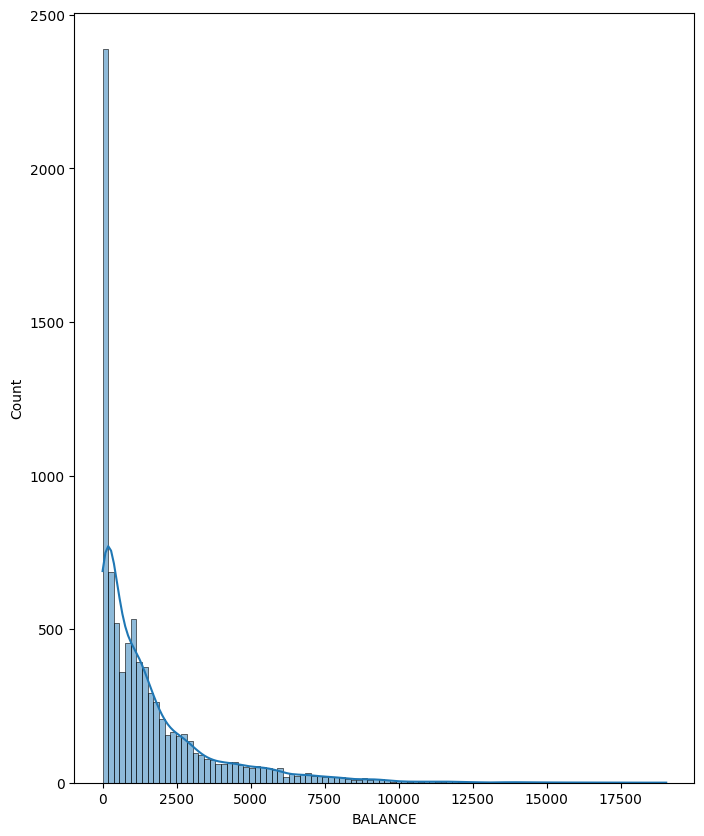

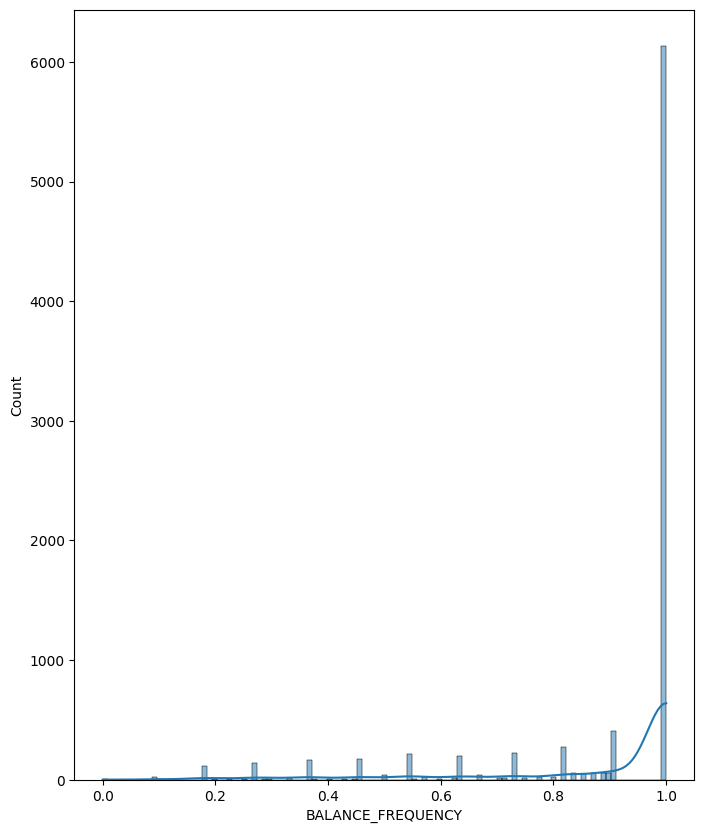

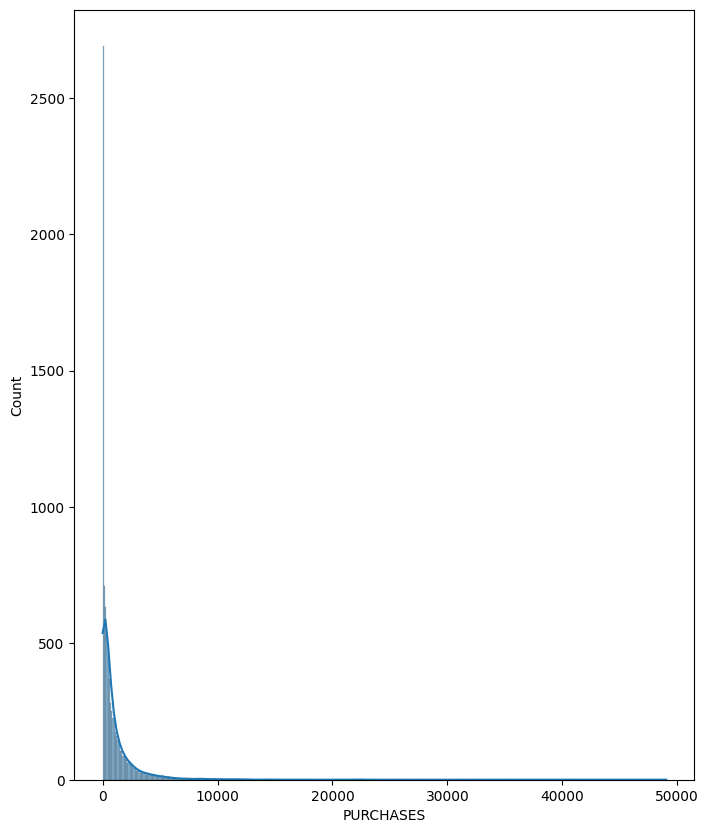

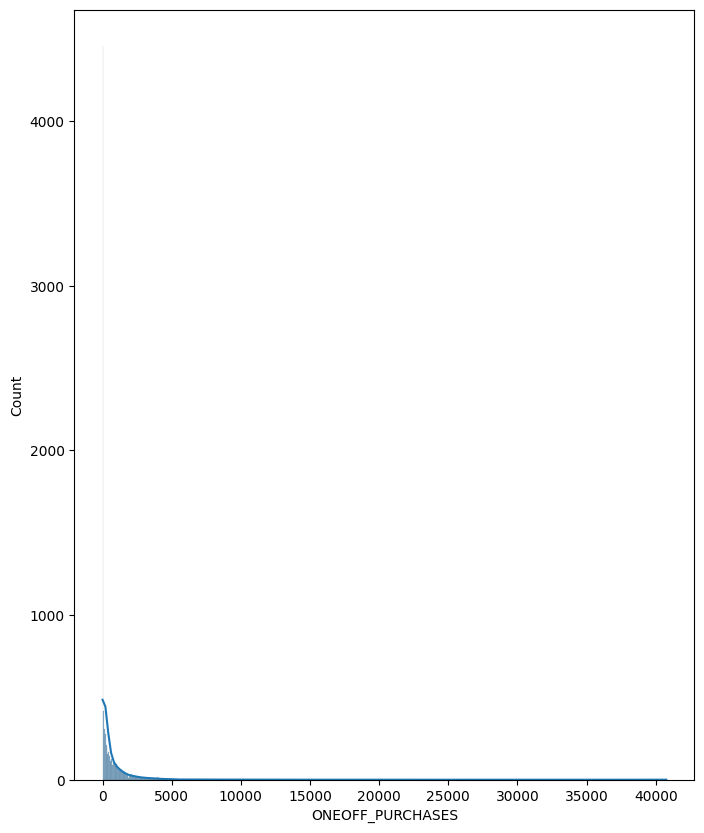

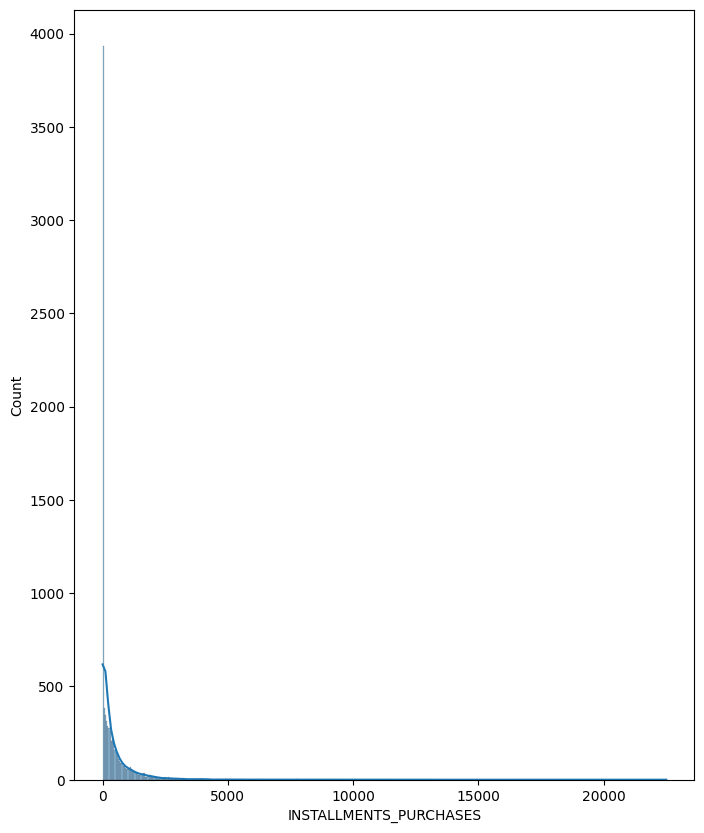

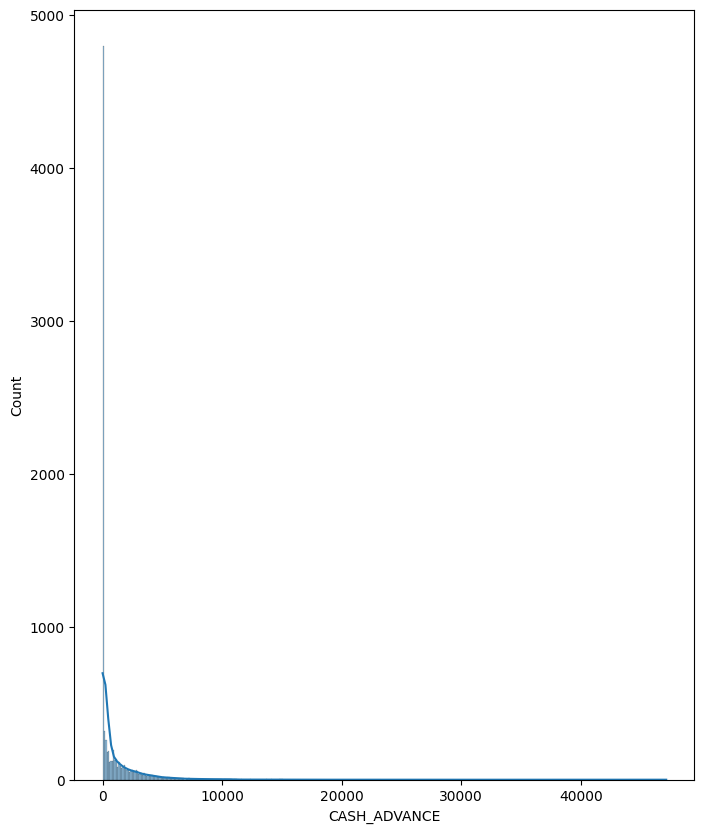

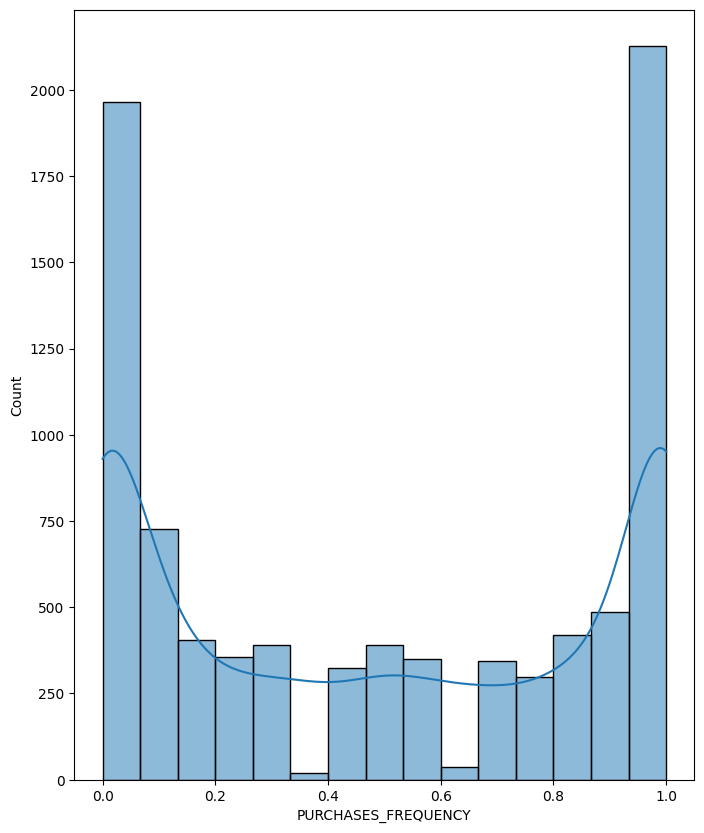

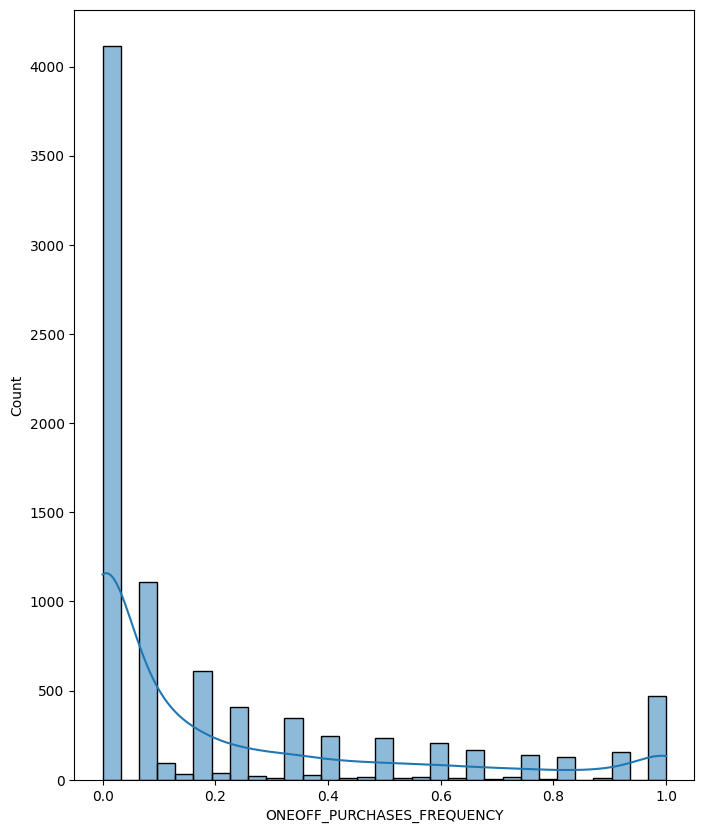

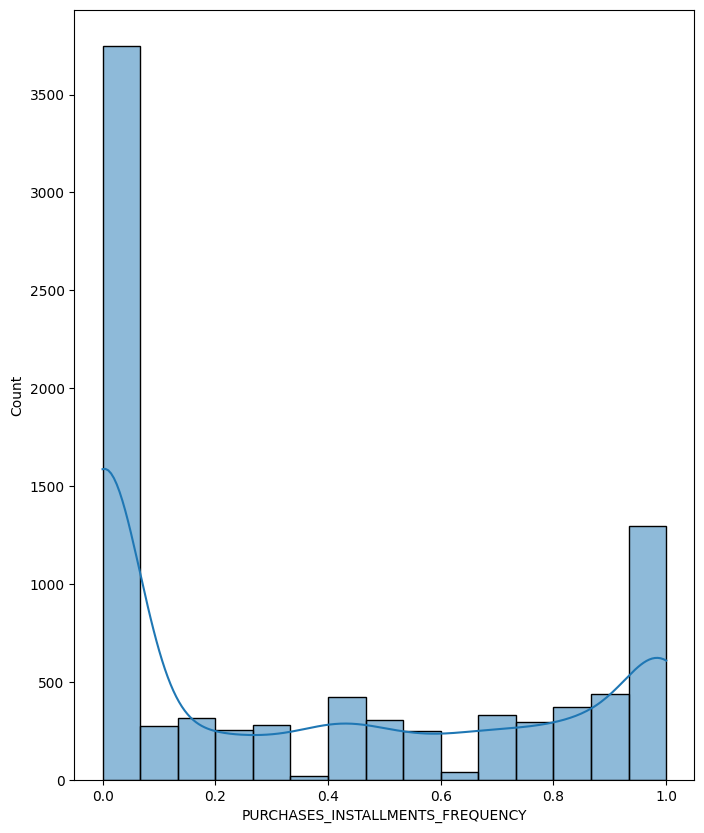

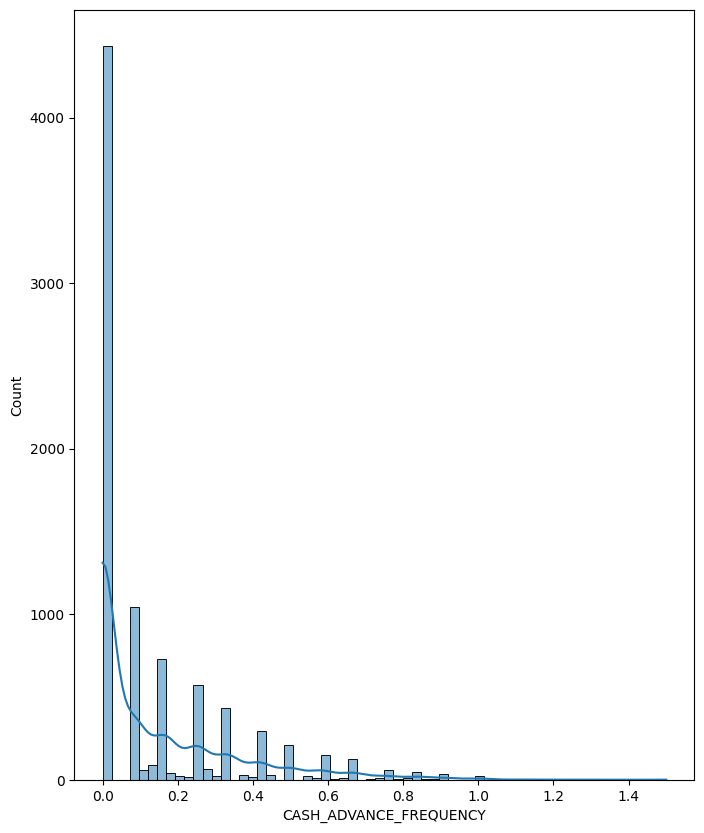

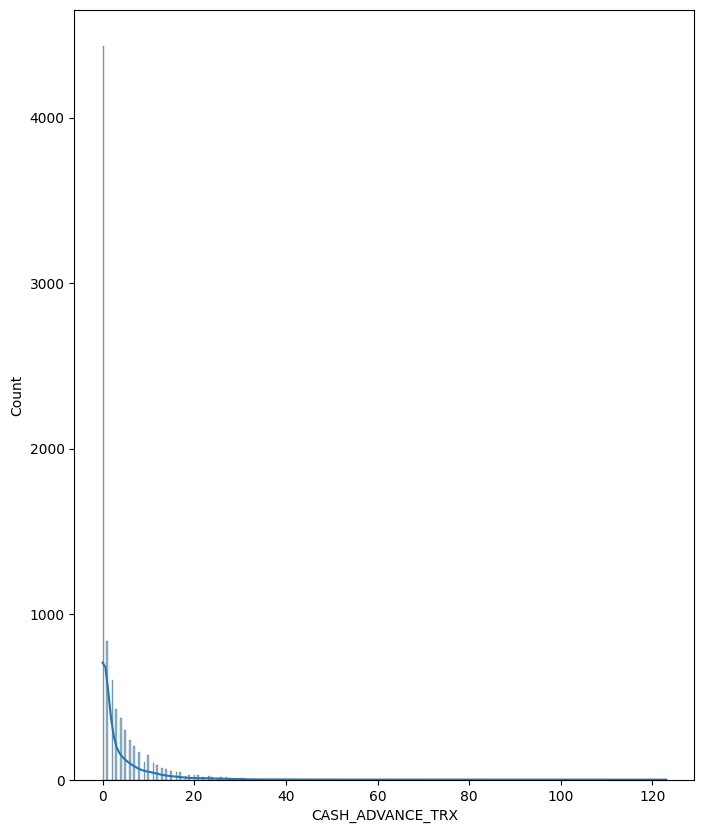

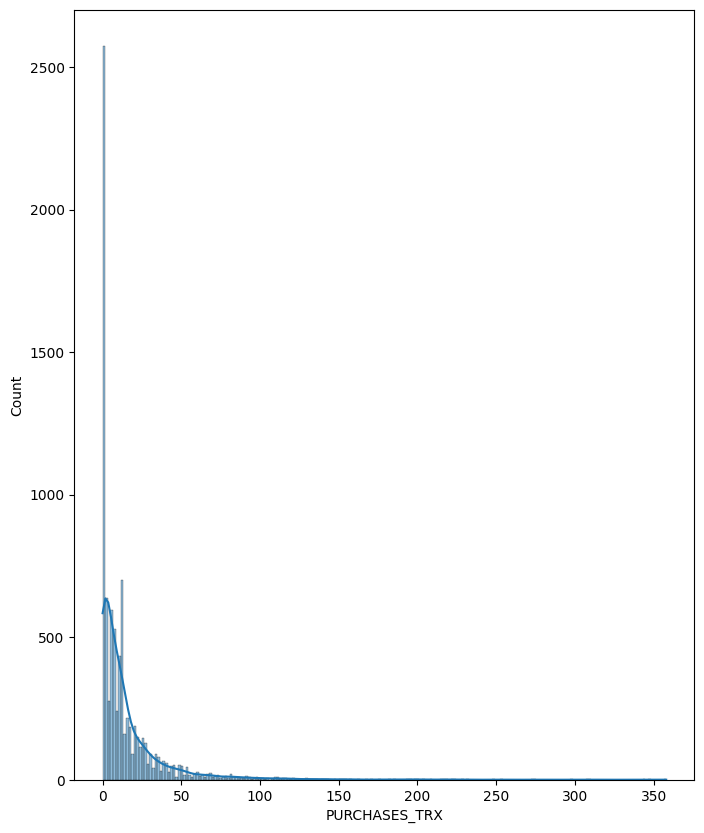

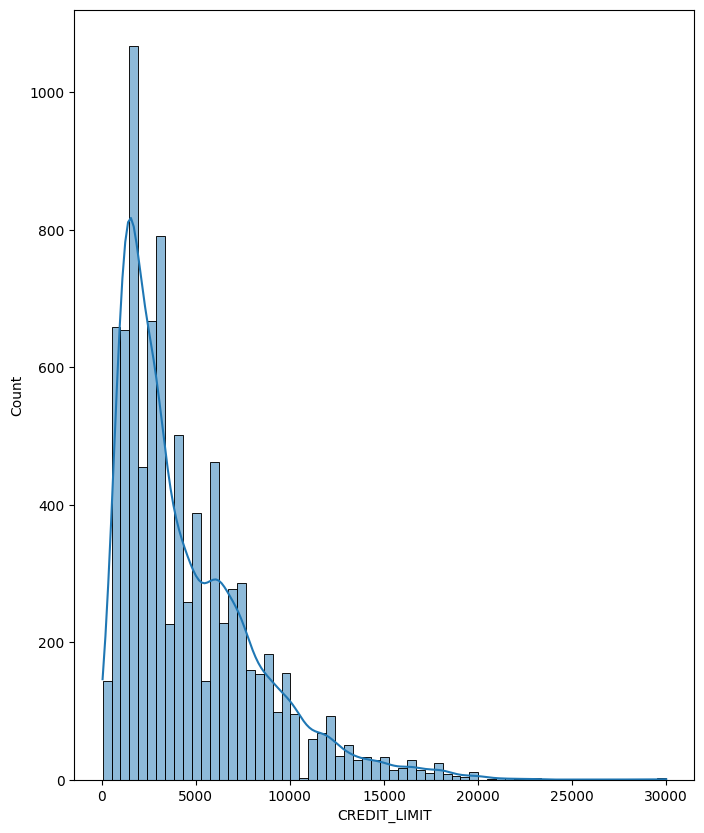

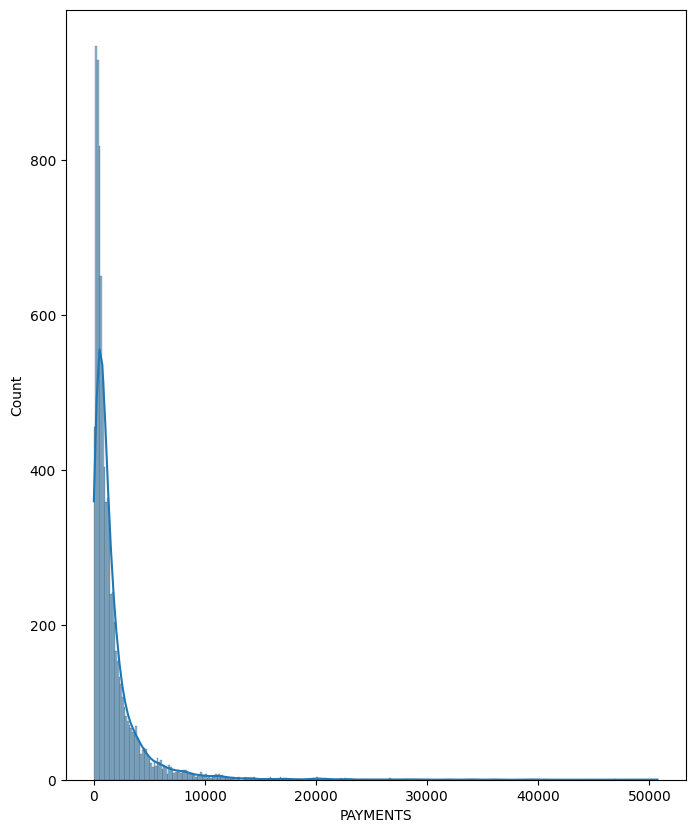

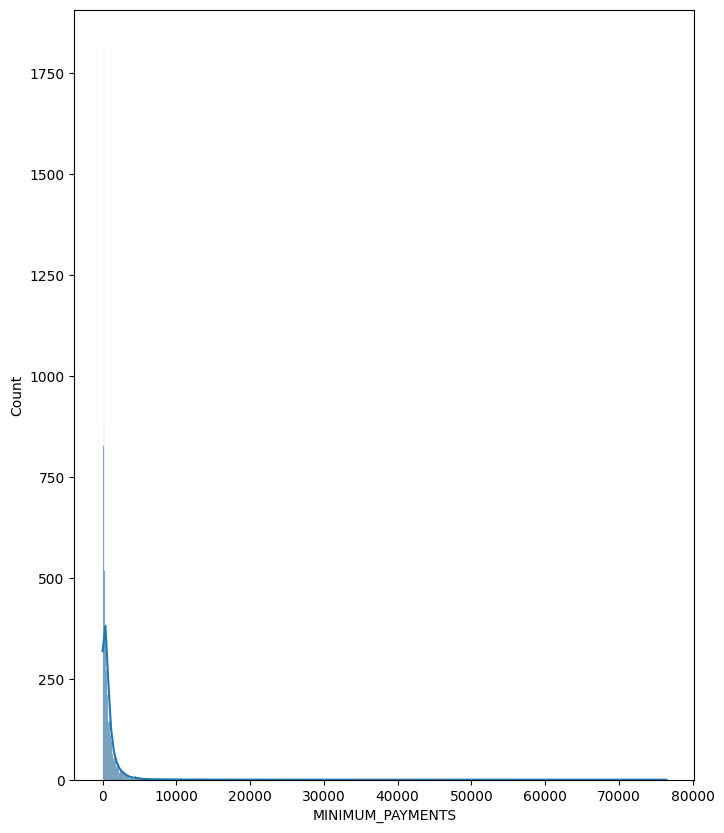

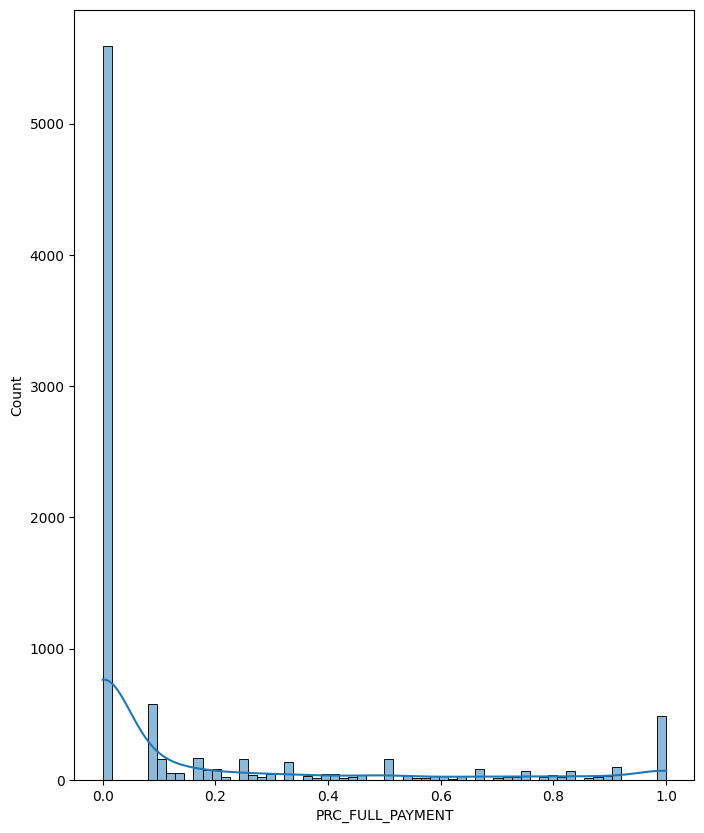

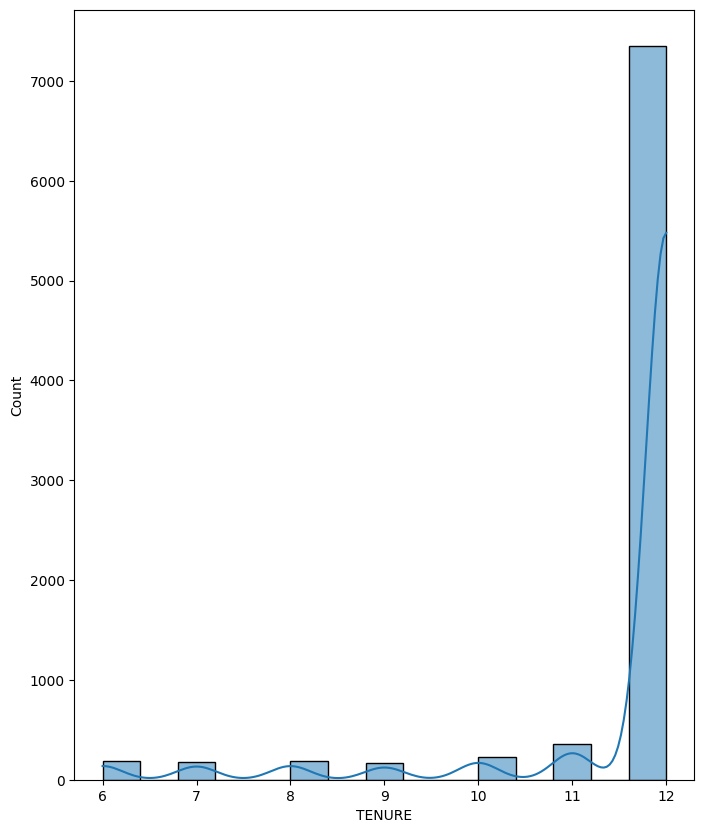

In [4]:
#Viendo las distribuciones de cada columna
for col in df.columns:
    fig, axs = plt.subplots(figsize=(8, 10))
    sns.histplot(data=df, x=col, kde=True, ax=axs)
    plt.show()

<Axes: >

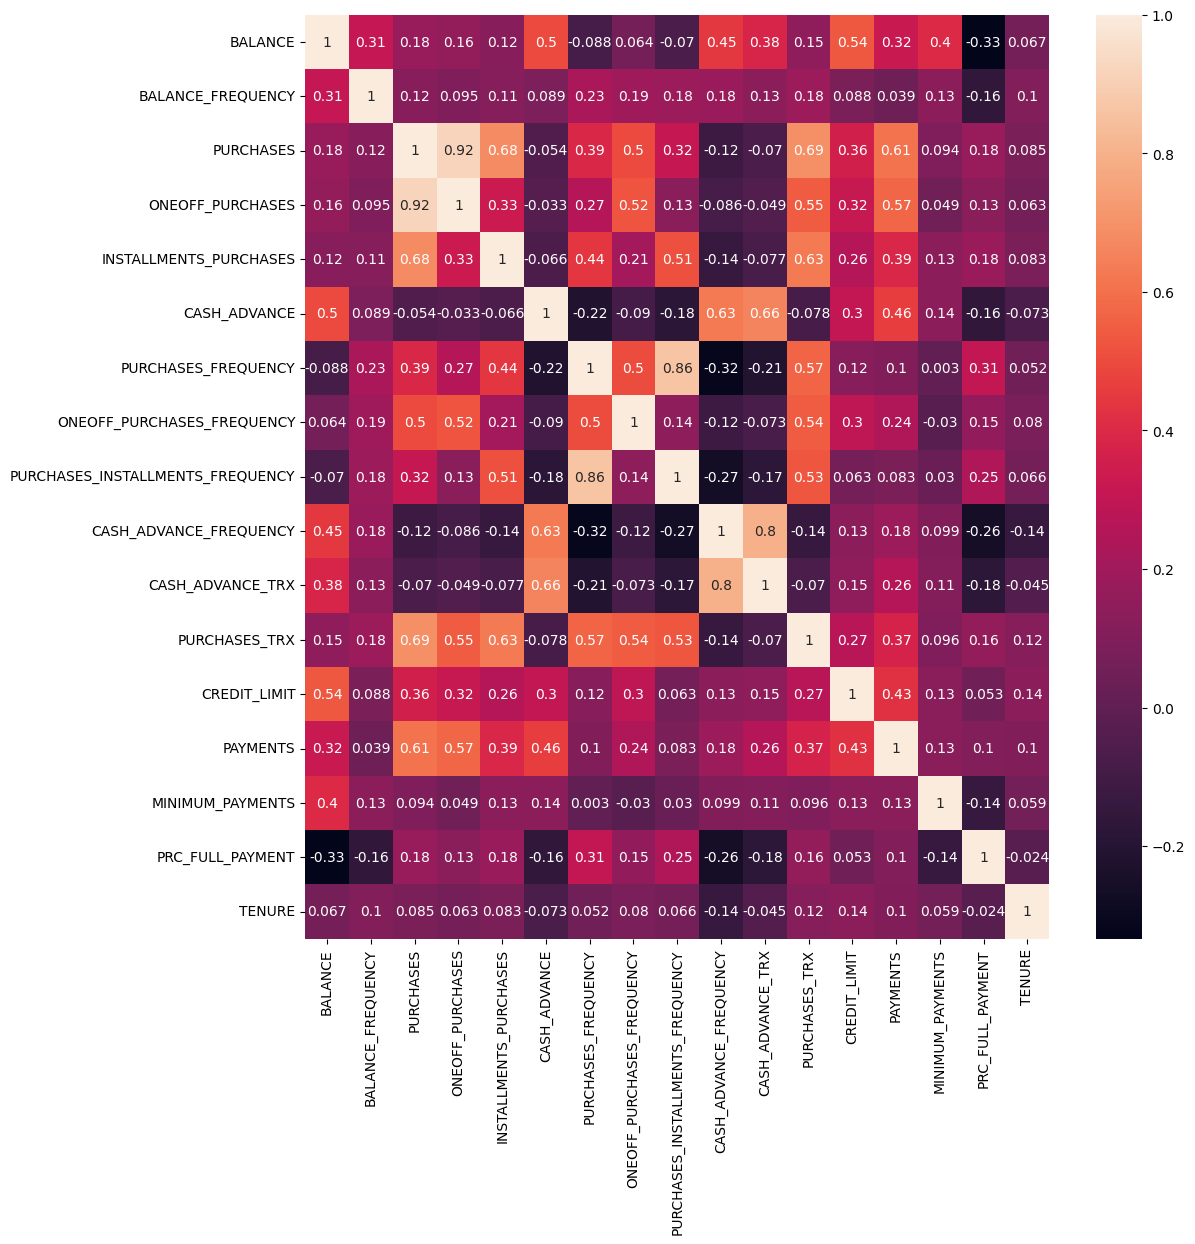

In [5]:
#Matriz de correlación
plt.figure(figsize=(12, 12))
sns.heatmap(df.corr(), annot=True)

In [6]:
#Configuracion inicial de atributos e importe de librerias
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_style("darkgrid")

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer

import umap

from sklearn.cluster import KMeans
from sklearn.cluster import MeanShift
from sklearn.mixture import GaussianMixture
from sklearn.cluster import AffinityPropagation
from sklearn.cluster import DBSCAN
from sklearn.cluster import OPTICS


import random
import time

std_figure_size = (8,5)
plt.rc("axes", labelweight="bold", labelsize="large", titleweight="bold", titlesize=14, titlepad=10)

fixed_random_state = random.seed(42)
n_parallel_jobs = -1

%config IPCompleter.use_jedi=False

c:\Users\Simon R\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [7]:
#Codigo para limpiar(poner en minusculas y quitar los espacios de) los nombres de las columnas

cols_cleaned = []

for col in df.columns:
    cols_cleaned.append(col.strip().lower().replace(' ', '_'))

df.columns = cols_cleaned

# sanity check
df.head()

balance  balance_frequency  purchases  oneoff_purchases  \
0    40.900749           0.818182      95.40              0.00   
1  3202.467416           0.909091       0.00              0.00   
2  2495.148862           1.000000     773.17            773.17   
4   817.714335           1.000000      16.00             16.00   
5  1809.828751           1.000000    1333.28              0.00   

   installments_purchases  cash_advance  purchases_frequency  \
0                   95.40      0.000000             0.166667   
1                    0.00   6442.945483             0.000000   
2                    0.00      0.000000             1.000000   
4                    0.00      0.000000             0.083333   
5                 1333.28      0.000000             0.666667   

   oneoff_purchases_frequency  purchases_installments_frequency  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
4                    0.083333                          0.000000   
5                    0.000000                          0.583333   

   cash_advance_frequency  cash_advance_trx  purchases_trx  credit_limit  \
0                    0.00                 0              2        1000.0   
1                    0.25                 4              0        7000.0   
2                    0.00                 0             12        7500.0   
4                    0.00                 0              1        1200.0   
5                    0.00                 0              8        1800.0   

      payments  minimum_payments  prc_full_payment  tenure  
0   201.802084        139.509787          0.000000      12  
1  4103.032597       1072.340217          0.222222      12  
2   622.066742        627.284787          0.000000      12  
4   678.334763        244.791237          0.000000      12  
5  1400.057770       2407.246035          0.000000      12

# Probando distintos algoritmos de Clustering

In [8]:
algos = ["K-means", "Mean shift", "Gaussian mixtures", "Affinity propagation", "DBSCAN", "OPTICS"]

# Guardando tiempos de entrenamiento para cada algoritmo
training_times = []

## Escalando y estandarizando datos

In [9]:
X = StandardScaler().fit_transform(df)
X = PowerTransformer(standardize=False).fit_transform(X)
X = pd.DataFrame(X, columns=df.columns)

# sanity check
X.head()

balance  balance_frequency  purchases  oneoff_purchases  \
0 -1.228615          -0.240001  -0.715252         -0.650233   
1  0.487688           0.074381  -0.828010         -0.650233   
2  0.322774           0.984719  -0.134551          0.085109   
3 -0.489346           0.984719  -0.808493         -0.623542   
4  0.092471           0.984719   0.120244         -0.650233   

   installments_purchases  cash_advance  purchases_frequency  \
0               -0.546224     -0.849567            -0.833826   
1               -0.794867      0.521278            -1.263449   
2               -0.794867     -0.849567             1.228744   
3               -0.794867     -0.849567            -1.048112   
4                0.423880     -0.849567             0.421545   

   oneoff_purchases_frequency  purchases_installments_frequency  \
0                   -1.163825                         -0.891061   
1                   -1.163825                         -1.212713   
2                    0.831265                         -1.212713   
3                   -0.568349                         -1.212713   
4                   -1.163825                          0.458532   

   cash_advance_frequency  cash_advance_trx  purchases_trx  credit_limit  \
0               -1.108009         -0.845331      -0.828278     -1.449192   
1                0.387387          0.088109      -1.019531      0.511886   
2               -1.108009         -0.845331      -0.135425      0.588510   
3               -1.108009         -0.845331      -0.921487     -1.340620   
4               -1.108009         -0.845331      -0.363771     -1.034003   

   payments  minimum_payments  prc_full_payment    tenure  
0 -0.951533         -0.527826         -1.024770  0.868208  
1  0.416756          0.075352          0.166016  0.868208  
2 -0.608185         -0.119796         -1.024770  0.868208  
3 -0.567787         -0.417473         -1.024770  0.868208  
4 -0.152724          0.277323         -1.024770  0.868208

## Reducción de la dimensionalidad por medio de UMAP

Antes de la agrupación, el número de características se reduce de 4 a 2. La razón principal es poder «ver» directamente si las agrupaciones identificadas tienen sentido**. Además, (i) las métricas de similitud tienden a funcionar mejor en dimensiones más bajas (las medidas de distancia degeneran para un gran número de características de entrada), y (ii) esta reducción de la dimensionalidad también mitiga la relativamente pobre «relación observaciones-características» de este conjunto de datos.


In [10]:
reducer = umap.UMAP(n_components=2, n_neighbors=25, n_jobs=n_parallel_jobs, random_state=fixed_random_state)
embedding = reducer.fit_transform(X)

X = pd.DataFrame(embedding, columns=["comp_1", "comp_2"])

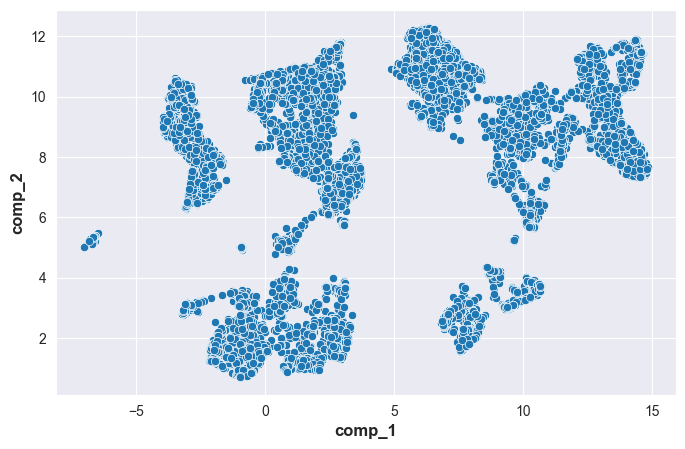

In [11]:
plt.figure(figsize=std_figure_size)
sns.scatterplot(data= X, x="comp_1", y="comp_2")
plt.show()

Mirando la visualización hecha por medio de UMAP, parece haber entre 6 y 7 clusters.

## Definición de la función de visualización y comprobación de convergencia



In [12]:
# Función para visualizar los clusters identificados

def visualize_clusters(*, df, labels_all, hyperparam_name, hyperparam_val, noise_exist):
    """Visualización de clusters identificados. Solo se considera un único hiperparámetro.

    Argumentos
    ==========
    df: pandas.DataFrame
        DataFrame de características de entrada.
    labels_all: list | numpy.array
        IDs de clusters identificados.
    hyperparam_name: str | None
        Nombre del hiperparámetro.
    hyperparam_val: float | int | None
        Valor del hiperparámetro.
    noise_exist: bool
        True si el algoritmo modela ruido, False en caso contrario.
        Asume que el ruido se codifica como cluster ID = -1.

    Retorna
    =======
    None
    Imprime una figura.

    """

    # Se omite la comprobación de parámetros de entrada para este notebook

    labels = sorted(pd.Series(labels_all).unique())
    number_of_clusters = len(labels)

    if number_of_clusters > 20:
        print(f"Se encontraron {number_of_clusters} clusters.  No se visualizarán los resultados.")
        
        
    elif noise_exist:

        # Calcula el porcentaje de outliers (ruido)
        outlier_perc = int(round(( (len(df) - sum(np.where(labels_all == -1, False, True))) / len(df) ) * 100, 0))

        plt.figure(figsize=std_figure_size)
        for label in labels:
            if label == -1:
                marker_style = "*"  # Usa asteriscos para representar el ruido
            else:
                marker_style = "o"  # Usa círculos para los clusters normales
            sns.scatterplot(data=df.loc[labels_all == label, :], x="comp_1", y="comp_2", label=str(label), marker=marker_style)
        if hyperparam_name or hyperparam_val:
            plt.title(f"{hyperparam_name}: {hyperparam_val}; 'Ruido': {outlier_perc}%")
        else:
            plt.title(f"Valores por defecto para todos los hiperparámetros; 'Ruido': {outlier_perc}%")
        plt.legend(title="ID del cluster")
        plt.show()


    else:

        plt.figure(figsize=std_figure_size)
        for label in labels:
            sns.scatterplot(data=df.loc[labels_all == label, :], x="comp_1", y="comp_2", label=str(label))
        if hyperparam_name or hyperparam_val:
            plt.title(f"{hyperparam_name}: {hyperparam_val}")
        else:
            plt.title(f"Valores por defecto para todos los hiperparámetros")
        plt.legend(title="ID del cluster")
        plt.show()


def convergence_check(model):
    """Comprueba si el modelo ajustado convergió dentro del número máximo de iteraciones."""
    if model.n_iter_ < model.max_iter:
        print(f"¡El algoritmo convergió exitosamente!\nn_iter: {model.n_iter_}, max_iter: {model.max_iter}\n")
    else:
        print(f"ADVERTENCIA: ¡El algoritmo no convergió dentro de {model.max_iter} iteraciones!\n")

## Algoritmo 1: K-means

K-means es el algoritmo de clustering más conocido y «básico».
Su hiperparámetro más importante es ***n_clusters***, que es el número de clusters(grupos) que debe buscar el algoritmo.

In [13]:
# hiperparametro a modificar

kmeans_hparam = "n_clusters"

### Identificación del número «óptimo» de clusters
En el contexto de la agrupación mediante K-means, la suma de las distancias al cuadrado de los puntos a sus respectivos centroides se conoce como «**inercia**». En este caso, encontrar un número adecuado de conglomerados significa encontrar el punto de rendimiento decreciente al aumentar el número de centroides. Esto se hace visualmente identificando un posible punto de inflexión en el gráfico de la inercia frente al número de conglomerados.

In [14]:
inertias_1 = []
range_clusters_1 = np.arange(2, 10, dtype=int)

for n in range_clusters_1:
    kmeans_1 = KMeans(n_clusters=n, random_state=fixed_random_state).fit(X)
    inertias_1.append(kmeans_1.inertia_)

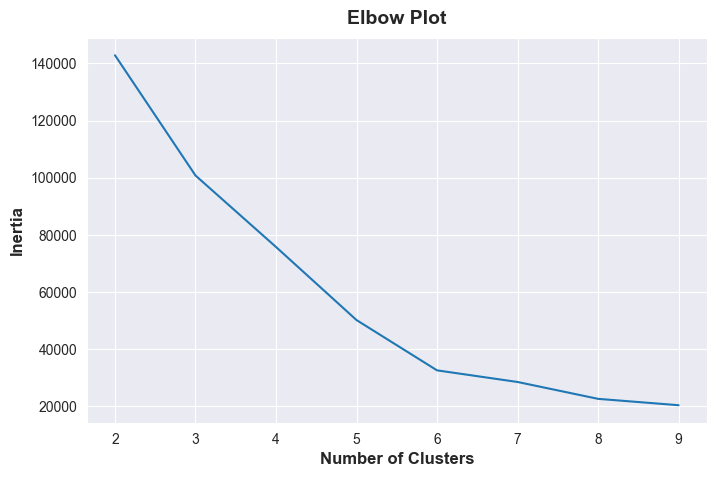

In [15]:
fig, axs = plt.subplots(figsize=std_figure_size)
sns.lineplot(x=range_clusters_1, y=inertias_1)
plt.title('Elbow Plot')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

Se aprecian varios "codos" en el diagrma, en 6, 5 y 3. Se escoge 6 como el número de Clusters, pues es el que tiene más sentido teniendo en cuenta la visualización hecha con UMAP

### Entrenando un modelo de K-Means con el numero optimo de  *n_clusters*(6)

In [16]:
%%time

start_time = time.time()

kmeans = KMeans(n_clusters=6, random_state=fixed_random_state)

labels_1 = kmeans.fit_predict(X)

convergence_check(kmeans)

training_times.append(time.time() - start_time)

¡El algoritmo convergió exitosamente!
n_iter: 7, max_iter: 300

CPU times: total: 0 ns
Wall time: 9.5 ms


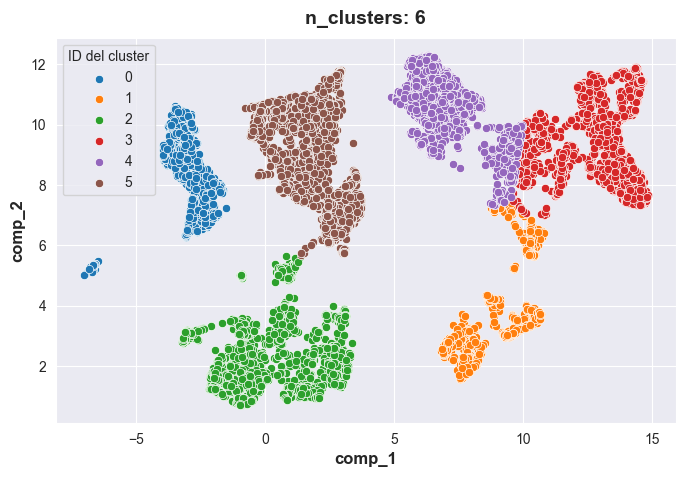

In [17]:
visualize_clusters(df=X, labels_all=labels_1, hyperparam_name=kmeans_hparam, hyperparam_val=6, noise_exist=False)

## Algoritmo 2: Mean shift (Desplazamiento del promedio)
Al igual que K-means, Mean shift es un algoritmo basado en centroides. Sin embargo, a diferencia de K-means, no es necesario especificar por adelantado el número de clusters. Su principal hiperparámetro es ***ancho de banda***, que representa la extensión de las «regiones de búsqueda local». Sin embargo, si no se especifica este parámetro, sklearn proporciona una estimación del mismo. Además, Mean shift también viene con la opción de no asociar necesariamente todos los puntos de datos con un cluster mediante el ajuste *cluster_all* a *False*. Este aspecto del algoritmo también se explora a continuación.

In [18]:
# hyperparamter to tune

meanshift_hparam = "bandwidth"

### Corriendo el algoritmo con los parametros por defecto

In [19]:
%%time

start_time = time.time()

meanshift = MeanShift(n_jobs=n_parallel_jobs)

labels_2 = meanshift.fit_predict(X)

convergence_check(meanshift)

training_times.append(time.time() - start_time)

¡El algoritmo convergió exitosamente!
n_iter: 39, max_iter: 300

CPU times: total: 5.59 s
Wall time: 34.1 s


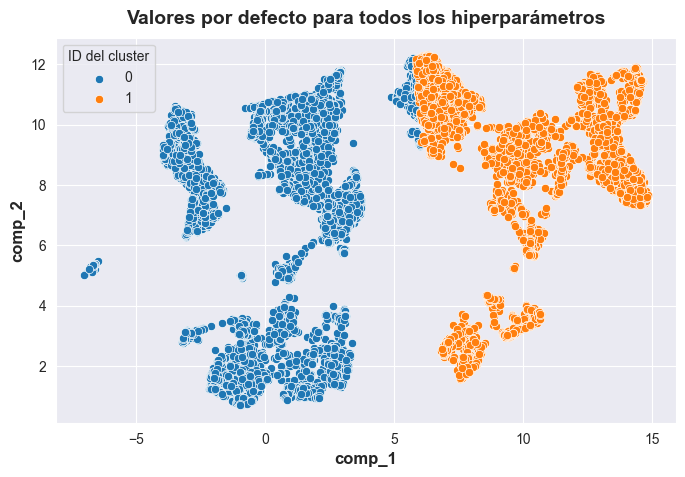

In [20]:
visualize_clusters(df=X, labels_all=labels_2, hyperparam_name=None, hyperparam_val=None, noise_exist=False)

Con los parmetros por defecto solo se obtienen dos clusters, un numero mucho menor al esperado

### Probando distintos valores de bandwith

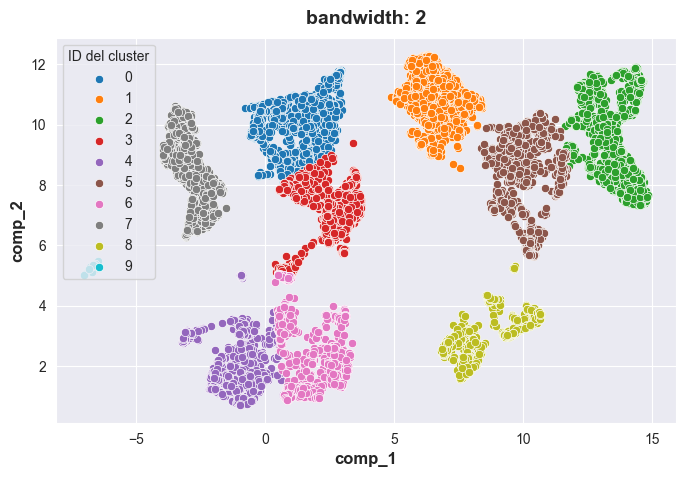

¡El algoritmo convergió exitosamente!
n_iter: 28, max_iter: 300



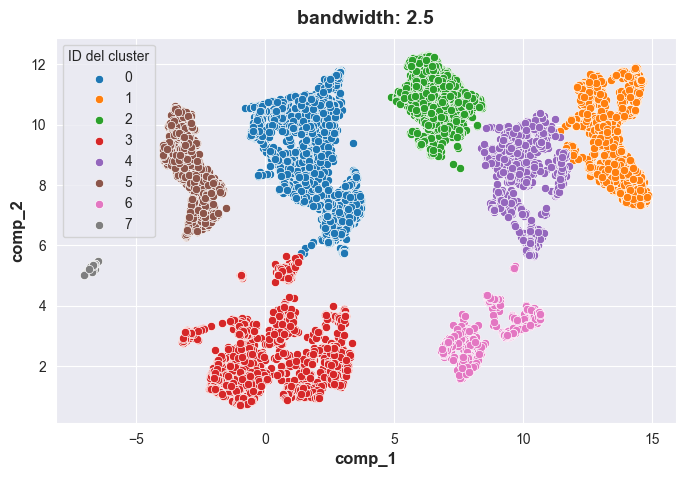

¡El algoritmo convergió exitosamente!
n_iter: 44, max_iter: 300



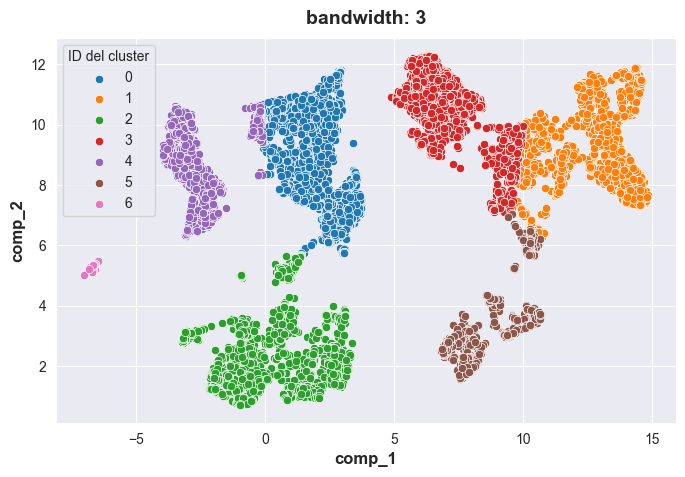

¡El algoritmo convergió exitosamente!
n_iter: 38, max_iter: 300



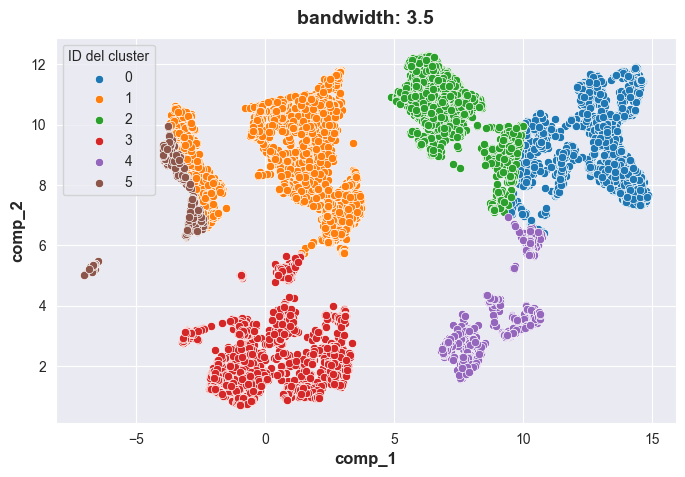

¡El algoritmo convergió exitosamente!
n_iter: 22, max_iter: 300



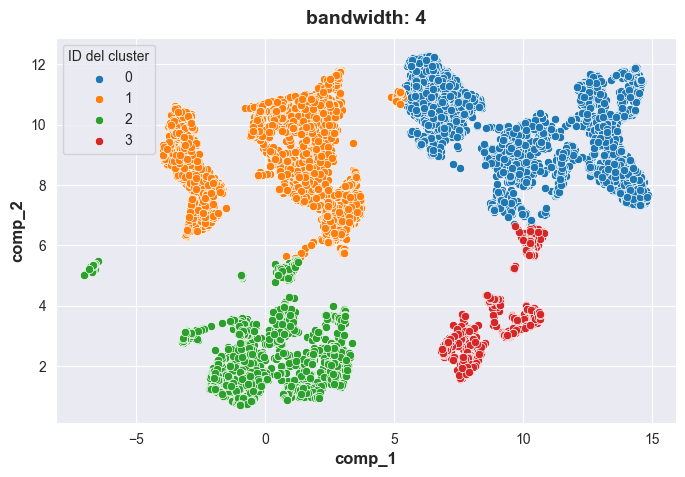

¡El algoritmo convergió exitosamente!
n_iter: 37, max_iter: 300



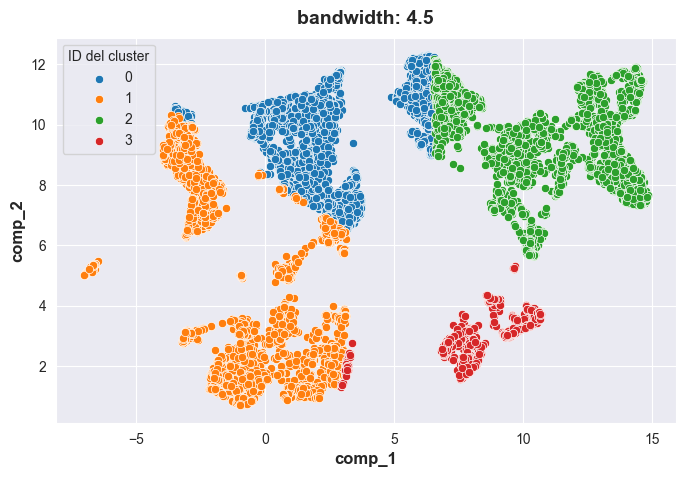

¡El algoritmo convergió exitosamente!
n_iter: 33, max_iter: 300

CPU times: total: 6.44 s
Wall time: 1min 24s


In [21]:
%%time

bandwidths = [2, 2.5, 3, 3.5, 4, 4.5]

for b in bandwidths:
    meanshift = MeanShift(n_jobs=n_parallel_jobs, bandwidth=b)
    labels_2 = meanshift.fit_predict(X)
    visualize_clusters(df=X, labels_all=labels_2, hyperparam_name=meanshift_hparam, hyperparam_val=b, noise_exist=False)
    convergence_check(meanshift)

Con un bandwith de 3 se obtiene el numero de clusters esperados, parece que mientrs mayor es el bandwith, menor es el número de Clusters encontrados

### Permitiendo que haya "ruido"
Esto se activa por medio del parametro *cluster_all=False*.

In [22]:
%%time

start_time = time.time()

meanshift = MeanShift(cluster_all=False, n_jobs=n_parallel_jobs, bandwidth=3)

labels_2 = meanshift.fit_predict(X)

convergence_check(meanshift)

training_time_meanshift_noise = time.time() - start_time

¡El algoritmo convergió exitosamente!
n_iter: 38, max_iter: 300

CPU times: total: 1.28 s
Wall time: 12 s


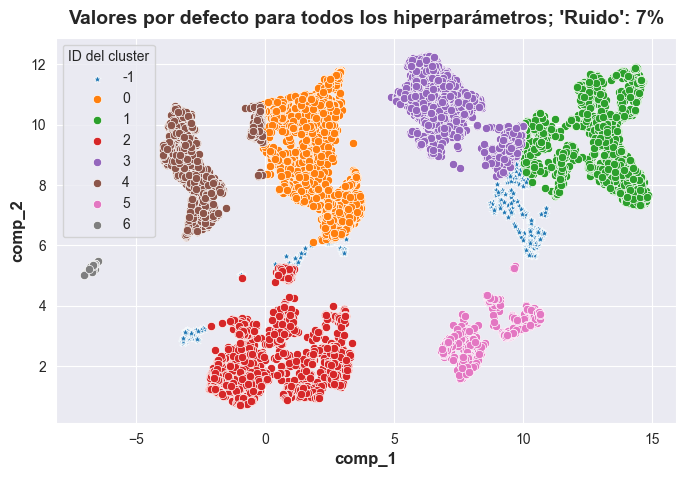

In [23]:
visualize_clusters(df=X, labels_all=labels_2, hyperparam_name=None, hyperparam_val=None, noise_exist=True)

## Algoritmo 3: Mezcla Gaussiana

El modelo de mezcla gaussiano es, como su nombre indica, un algoritmo basado en distribuciones. Su hiperparámetro principal es ***n_componentes***, que corresponde al número de clusters que hay que formar. Como método abreviado, aquí se adopta el número de clusters identificado en la sección K-means.

In [24]:
# hyperparamter to tune

gmm_hparam = "n_components"

In [25]:
%%time

start_time = time.time()

gmm = GaussianMixture(n_components=6, random_state=fixed_random_state)

labels_3 = gmm.fit_predict(X)

convergence_check(gmm)

training_times.append(time.time() - start_time)

¡El algoritmo convergió exitosamente!
n_iter: 5, max_iter: 100

CPU times: total: 469 ms
Wall time: 168 ms


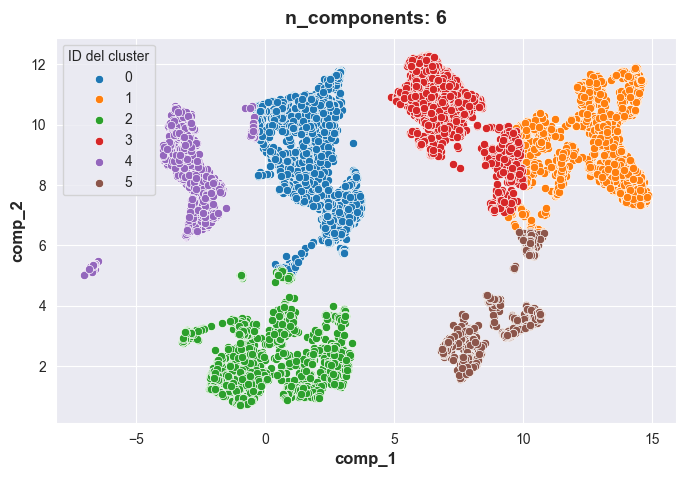

In [26]:
visualize_clusters(df=X, labels_all=labels_3, hyperparam_name=gmm_hparam, hyperparam_val=6, noise_exist=False)

Con los parametros por defecto se obtienen los 6 clusters que buscabamos

### Algoritmo 4: Affinity propagation (Propagación de afinidad)

La propagación de afinidad no requiere especificar el número de clusters por adelantado. Su principal hiperparámetro es la amortiguación, que es un valor comprendido entre 0,5 (incl.) y 1,0 (excl.).

In [27]:
# hyperparamter to tune

affprop_hparam = "damping"

#### Corriendo el algoritmo con los parametros por defecto

In [28]:
%%time

affprop = AffinityPropagation(random_state=fixed_random_state)

labels_4 = affprop.fit_predict(X)

convergence_check(affprop)

c:\Users\Simon R\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_affinity_propagation.py:142: ConvergenceWarning: Affinity propagation did not converge, this model may return degenerate cluster centers and labels.
  warnings.warn(


ADVERTENCIA: ¡El algoritmo no convergió dentro de 200 iteraciones!

CPU times: total: 54.5 s
Wall time: 4min 52s


In [29]:
visualize_clusters(df=X, labels_all=labels_4, hyperparam_name=None, hyperparam_val=None, noise_exist=False)

Se encontraron 5024 clusters.  No se visualizarán los resultados.


Con los valores por defecto se encuentra un número exagerado de Clusters

#### Probando distintos valores de damping

Se encontraron 45 clusters.  No se visualizarán los resultados.
¡El algoritmo convergió exitosamente!
n_iter: 57, max_iter: 1000

Se encontraron 46 clusters.  No se visualizarán los resultados.
¡El algoritmo convergió exitosamente!
n_iter: 107, max_iter: 1000

Se encontraron 45 clusters.  No se visualizarán los resultados.
¡El algoritmo convergió exitosamente!
n_iter: 113, max_iter: 1000



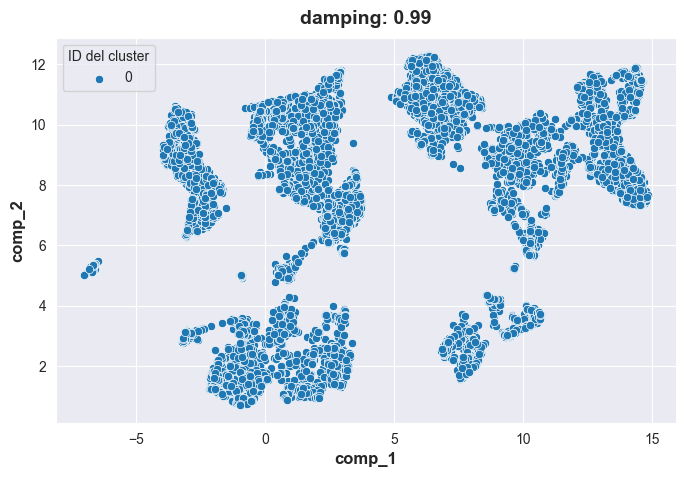

¡El algoritmo convergió exitosamente!
n_iter: 228, max_iter: 1000

CPU times: total: 2min 46s
Wall time: 13min 14s


In [30]:
%%time

damps = [0.85, 0.90, 0.96, 0.99]

for d in damps:
    affprop = AffinityPropagation(damping=d, max_iter=1000, random_state=fixed_random_state)
    labels_4 = affprop.fit_predict(X)
    visualize_clusters(df=X, labels_all=labels_4, hyperparam_name=affprop_hparam, hyperparam_val=d, noise_exist=False)
    convergence_check(affprop)

Mientras mayor es el damping menos clusterers se encuentran, pero entre 0.97 a 0.99 el algortimo pega un salto de 45 clusters a uno solo

### Probando distintos valores de preference

In [31]:
# hyperparamter to tune

affprop_hparam = "preference"

Se encontraron 99 clusters.  No se visualizarán los resultados.
¡El algoritmo convergió exitosamente!
n_iter: 425, max_iter: 500

Se encontraron 63 clusters.  No se visualizarán los resultados.
¡El algoritmo convergió exitosamente!
n_iter: 360, max_iter: 500



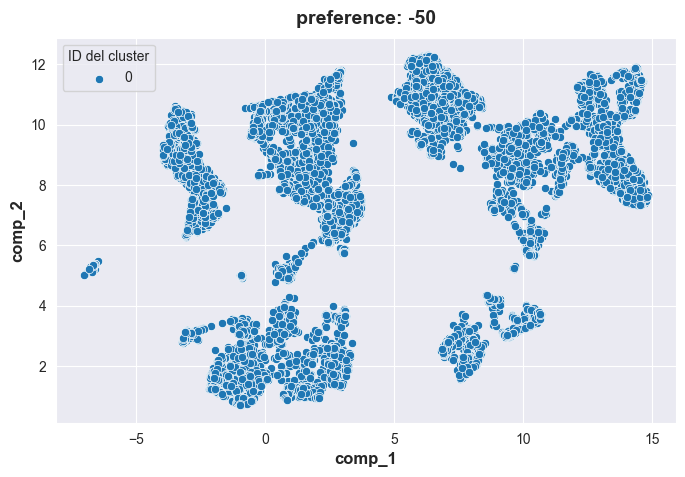

¡El algoritmo convergió exitosamente!
n_iter: 230, max_iter: 500



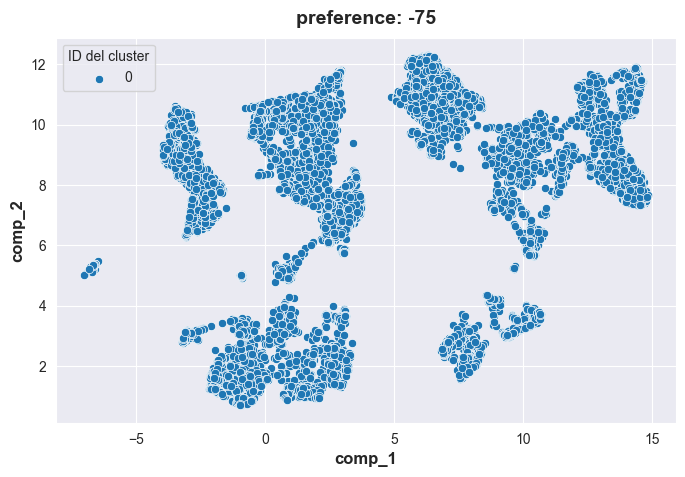

¡El algoritmo convergió exitosamente!
n_iter: 226, max_iter: 500

Se encontraron 35 clusters.  No se visualizarán los resultados.
¡El algoritmo convergió exitosamente!
n_iter: 328, max_iter: 500

CPU times: total: 6min 30s
Wall time: 30min 3s


In [32]:
%%time

prefs = [-10, -25, -50, -75, -100]

for p in prefs:
    affprop = AffinityPropagation(preference=p, max_iter=500, random_state=fixed_random_state, damping=0.99)
    labels_4 = affprop.fit_predict(X)
    visualize_clusters(df=X, labels_all=labels_4, hyperparam_name=affprop_hparam, hyperparam_val=p, noise_exist=False)
    convergence_check(affprop)

En general, a menor preference se encuentran menos clusters, pero el algoritmo parece ser extremadamente sensible a ajustes en este hiperparametro, dando saltos de 60 clusters a uno solo con solo cambiar preference por unas cuantas decenas

## Algoritmo 5: DBSCAN

DBSCAN es un algoritmo basado en la densidad. Supone que los conglomerados tienen una **densidad muy similar**. Su principal hiperparámetro es ***eps***, que es la distancia máxima entre dos muestras para que una se considere vecina de la otra. Su valor por defecto es 0,5. Este algoritmo viene con un segundo hiperparámetro importante, que es ***min_samples***. Representa el número de muestras en una vecindad para que un punto se considere un punto central. Sin embargo, *min_samples* no se ajusta en el contexto de este ejercicio.

A diferencia de los algoritmos 1 a 4, DBSCAN **no es iterativo, sino determinista** por naturaleza. Por lo tanto, no es necesario comprobar la convergencia.

Una característica fundamental de DBSCAN es que también intenta identificar «**ruido**», es decir, puntos de datos no asociados a ningún cluster. Esos puntos de datos se representan en los siguientes gráficos como estrellas azules con ID de cluster -1.

Traducción realizada con la versión gratuita del traductor DeepL.com

In [33]:
# hyperparamter to tune

dbscan_hparam = "eps"

### Corriendo con los parametros por defecto

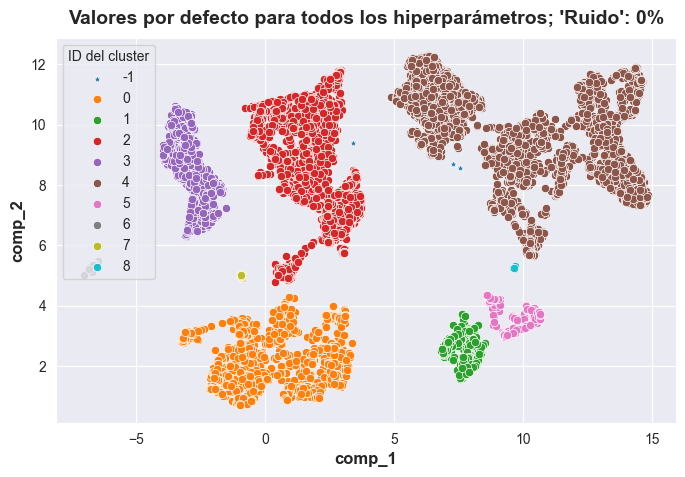

CPU times: total: 203 ms
Wall time: 814 ms


In [34]:
%%time

dbscan = DBSCAN(n_jobs=n_parallel_jobs)

labels_5 = dbscan.fit_predict(X)

visualize_clusters(df=X, labels_all=labels_5, hyperparam_name=None, hyperparam_val=None, noise_exist=True)

Con los hiperparámetros por defecto se encuentran más clusters de los esperados, aunque la forma en la que los separa tiene sentido, lo cual indica que tambien se podria trabajar con 8 clusters.

### Probando distintos valores de  *eps*

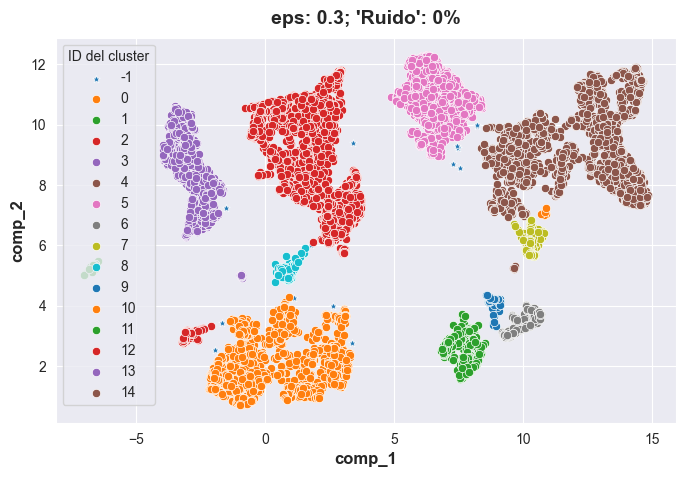

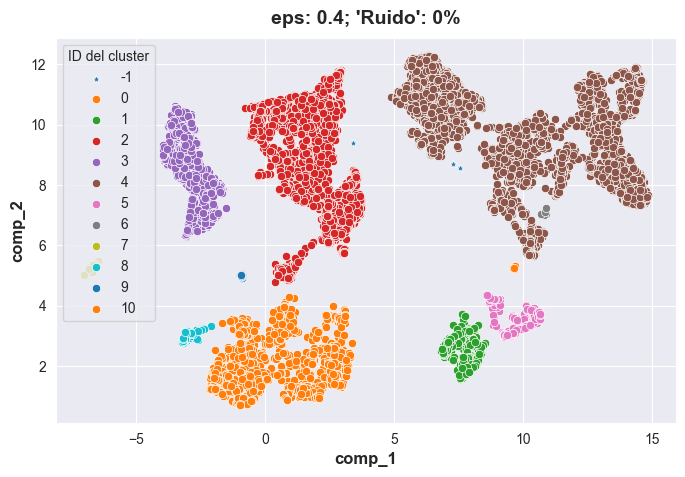

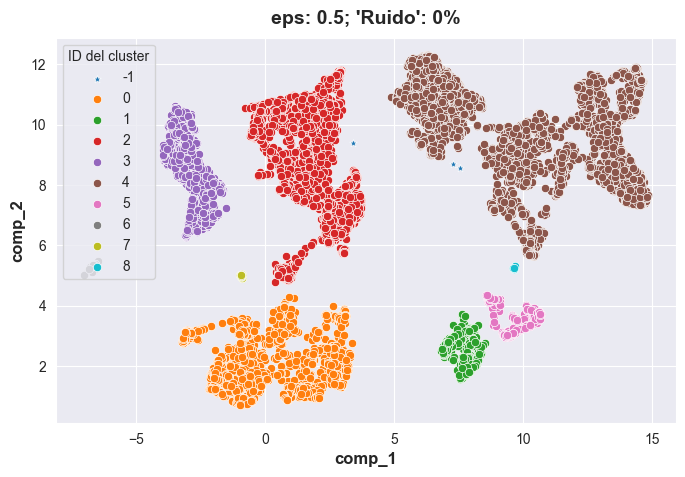

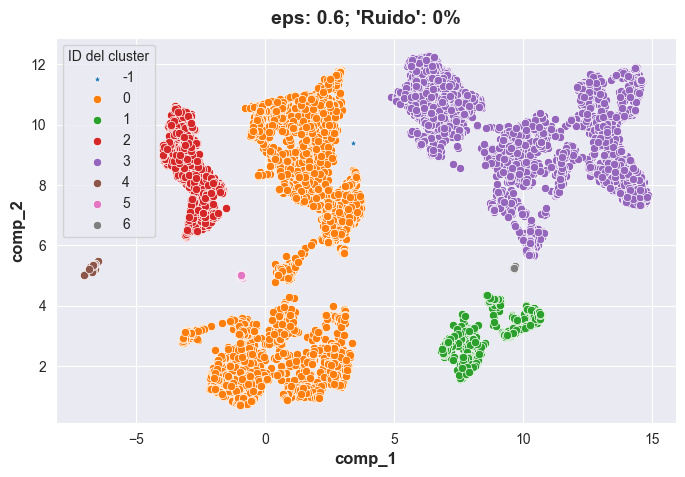

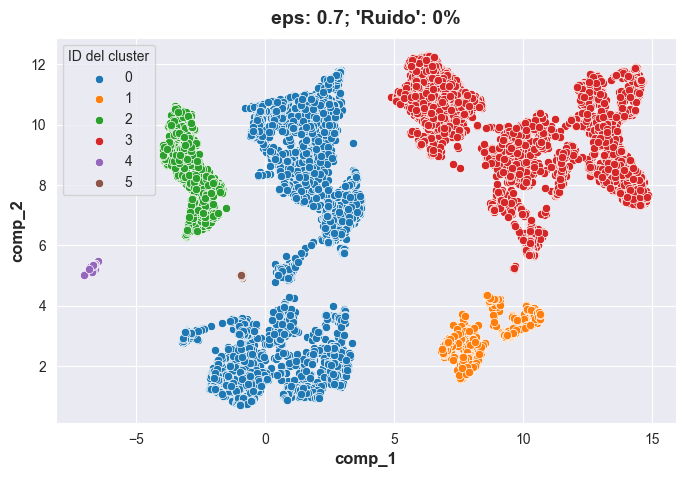

CPU times: total: 1.08 s
Wall time: 3.35 s


In [35]:
%%time

for e in [0.3, 0.4, 0.5, 0.6, 0.7]:

    dbscan = DBSCAN(eps=e, n_jobs=n_parallel_jobs)
    labels_5 = dbscan.fit_predict(X)

    visualize_clusters(df=X, labels_all=labels_5, hyperparam_name=dbscan_hparam, hyperparam_val=e, noise_exist=True)

Con un eps de 0.7 se obtienen los 6 clusters esperados, aunque la forma en la que se dividen los puntos no es la ideal, teniendo Clusters gigantescos y otros con unos pocos puntos.

## Algoritmo 6: OPTICS

OPTICS puede considerarse una versión «avanzada» de DBSCAN. Su diferencia clave con este último es que OPTICS presenta un **radio de vecindad variable**. Su principal hiperparámetro a ajustar es ***min_samples***, que es el número de muestras en un vecindario para que un punto sea considerado como punto central.OPTICS can be considered an "advanced" version of DBSCAN. Its key difference to the latter is that OPTICS features a **variable neighborhood radius**. Its main hyperparameter to tune is ***min_samples***, which is the number of samples in a neighborhood for a point to be considered as a core point.

In [36]:
# hyperparamter to tune

optics_hparam = "min_samples"

### Corriendo con los parametros por defecto

In [37]:
%%time

optics = OPTICS(n_jobs=n_parallel_jobs)

labels_6 = optics.fit_predict(X)

visualize_clusters(df=X, labels_all=labels_6, hyperparam_name=None, hyperparam_val=None, noise_exist=True)

Se encontraron 563 clusters.  No se visualizarán los resultados.
CPU times: total: 10.2 s
Wall time: 2min 16s


### Probando valores distintos de *min_samples*

In [38]:
%%time

for n_samples in [22, 26, 30, 34, 38]:

    optics = OPTICS(min_samples=n_samples, n_jobs=n_parallel_jobs)

    labels_6 = optics.fit_predict(X)

    visualize_clusters(df=X, labels_all=labels_6, hyperparam_name=optics_hparam, hyperparam_val=n_samples, noise_exist=True)

Se encontraron 89 clusters.  No se visualizarán los resultados.
Se encontraron 67 clusters.  No se visualizarán los resultados.
Se encontraron 57 clusters.  No se visualizarán los resultados.
Se encontraron 48 clusters.  No se visualizarán los resultados.
Se encontraron 40 clusters.  No se visualizarán los resultados.
CPU times: total: 51.5 s
Wall time: 11min 20s


Habría que probar más valores de min_samples para que el algoritmo encuentre 6 clusters, pero se nota claramente que mientras mas alto sea este valor, menos clusters se encuentran

# Extrayendo clusters

Luego de probar distintos algoritmos, he decidido quedarme con los clusters que me dio K-means, los cuales a mi parecer son los más logicos viendo la visualización que se hizo con U-MAP y el diagrama de codos.


In [39]:
#Añadiendo una columna que contenga el cluster al que pertenece cada cliente
df['Cluster'] = labels_1

df

balance  balance_frequency  purchases  oneoff_purchases  \
0       40.900749           0.818182      95.40              0.00   
1     3202.467416           0.909091       0.00              0.00   
2     2495.148862           1.000000     773.17            773.17   
4      817.714335           1.000000      16.00             16.00   
5     1809.828751           1.000000    1333.28              0.00   
...           ...                ...        ...               ...   
8943     5.871712           0.500000      20.90             20.90   
8945    28.493517           1.000000     291.12              0.00   
8947    23.398673           0.833333     144.40              0.00   
8948    13.457564           0.833333       0.00              0.00   
8949   372.708075           0.666667    1093.25           1093.25   

      installments_purchases  cash_advance  purchases_frequency  \
0                      95.40      0.000000             0.166667   
1                       0.00   6442.945483             0.000000   
2                       0.00      0.000000             1.000000   
4                       0.00      0.000000             0.083333   
5                    1333.28      0.000000             0.666667   
...                      ...           ...                  ...   
8943                    0.00      0.000000             0.166667   
8945                  291.12      0.000000             1.000000   
8947                  144.40      0.000000             0.833333   
8948                    0.00     36.558778             0.000000   
8949                    0.00    127.040008             0.666667   

      oneoff_purchases_frequency  purchases_installments_frequency  \
0                       0.000000                          0.083333   
1                       0.000000                          0.000000   
2                       1.000000                          0.000000   
4                       0.083333                          0.000000   
5                       0.000000                          0.583333   
...                          ...                               ...   
8943                    0.166667                          0.000000   
8945                    0.000000                          0.833333   
8947                    0.000000                          0.666667   
8948                    0.000000                          0.000000   
8949                    0.666667                          0.000000   

      cash_advance_frequency  cash_advance_trx  purchases_trx  credit_limit  \
0                   0.000000                 0              2        1000.0   
1                   0.250000                 4              0        7000.0   
2                   0.000000                 0             12        7500.0   
4                   0.000000                 0              1        1200.0   
5                   0.000000                 0              8        1800.0   
...                      ...               ...            ...           ...   
8943                0.000000                 0              1         500.0   
8945                0.000000                 0              6        1000.0   
8947                0.000000                 0              5        1000.0   
8948                0.166667                 2              0         500.0   
8949                0.333333                 2             23        1200.0   

         payments  minimum_payments  prc_full_payment  tenure  Cluster  
0      201.802084        139.509787          0.000000      12        2  
1     4103.032597       1072.340217          0.222222      12        1  
2      622.066742        627.284787          0.000000      12        5  
4      678.334763        244.791237          0.000000      12        5  
5     1400.057770       2407.246035          0.000000      12        5  
...           ...               ...               ...     ...      ...  
8943    58.644883         43.473717          0.000000       6        2  
89

In [40]:
# Eliminando outliers de cada una de las columnas por medio del rango intercuartilico
def remove_outliers(df, columns):
    for col in columns:
        if col != 'Cluster':
            Q1 = df[col].quantile(0.25)
            Q3 = df[col].quantile(0.75)
            IQR = Q3 - Q1

            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR

            # Update only rows within the current column bounds
            df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

df = remove_outliers(df, df.columns)
df


balance  balance_frequency  purchases  oneoff_purchases  \
0       40.900749           0.818182      95.40              0.00   
4      817.714335           1.000000      16.00             16.00   
7     1823.652743           1.000000     436.20              0.00   
8     1014.926473           1.000000     861.49            661.49   
14    2772.772734           1.000000       0.00              0.00   
...           ...                ...        ...               ...   
8728    39.061878           1.000000     297.02              0.00   
8729  2492.463204           1.000000       0.00              0.00   
8734   407.399529           1.000000       0.00              0.00   
8742    87.026009           1.000000     605.52              0.00   
8760   307.127754           1.000000     909.30            409.30   

      installments_purchases  cash_advance  purchases_frequency  \
0                      95.40      0.000000             0.166667   
4                       0.00      0.000000             0.083333   
7                     436.20      0.000000             1.000000   
8                     200.00      0.000000             0.333333   
14                      0.00    346.811390             0.000000   
...                      ...           ...                  ...   
8728                  297.02      0.000000             0.916667   
8729                    0.00   2625.644609             0.000000   
8734                    0.00   1364.307564             0.000000   
8742                  605.52      0.000000             1.000000   
8760                  500.00    237.378894             0.583333   

      oneoff_purchases_frequency  purchases_installments_frequency  \
0                       0.000000                          0.083333   
4                       0.083333                          0.000000   
7                       0.000000                          1.000000   
8                       0.083333                          0.250000   
14                      0.000000                          0.000000   
...                          ...                               ...   
8728                    0.000000                          0.916667   
8729                    0.000000                          0.000000   
8734                    0.000000                          0.000000   
8742                    0.000000                          0.916667   
8760                    0.166667                          0.500000   

      cash_advance_frequency  cash_advance_trx  purchases_trx  credit_limit  \
0                   0.000000                 0              2        1000.0   
4                   0.000000                 0              1        1200.0   
7                   0.000000                 0             12        2300.0   
8                   0.000000                 0              5        7000.0   
14                  0.083333                 1              0        3000.0   
...                      ...               ...            ...           ...   
8728                0.000000                 0             11        1000.0   
8729                0.250000                 7              0        3000.0   
8734                0.166667                 2              0        1500.0   
8742                0.000000                 0             12        1500.0   
8760                0.166667                 4             12        1000.0   

        payments  minimum_payments  prc_full_payment  tenure  Cluster  
0     201.802084        139.509787               0.0      12        2  
4     678.334763        244.791237               0.0      12        5  
7     679.065082        532.033990               0.0      12        5  
8     688.278568        311.963409               0.0      12        5  
14    805.647974        989.962866               0.0      12        3  
...          ...               ...               ...     ...      ...  
8728  297.329150        186.966130               0.0      12        5  
8729  621.

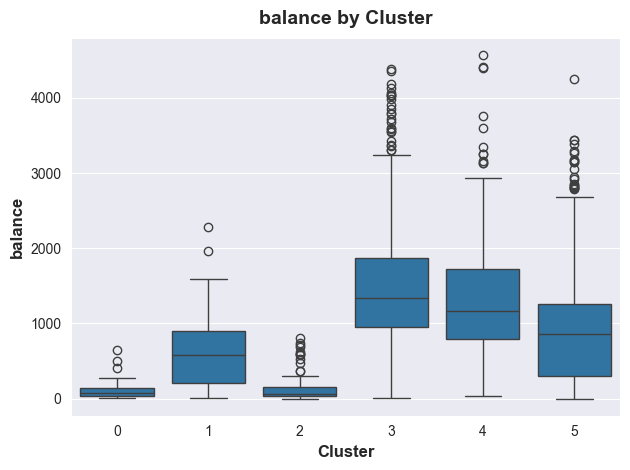

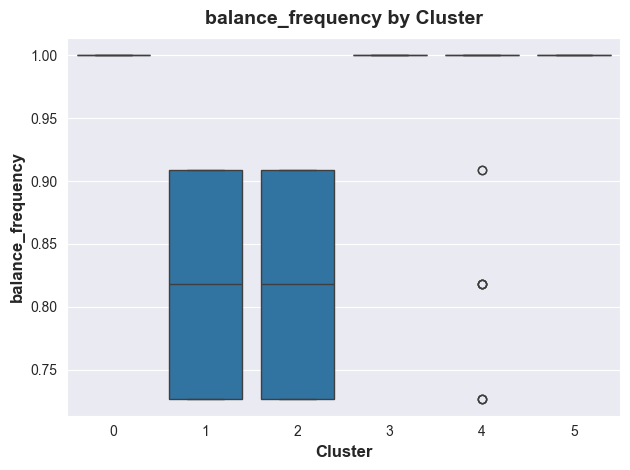

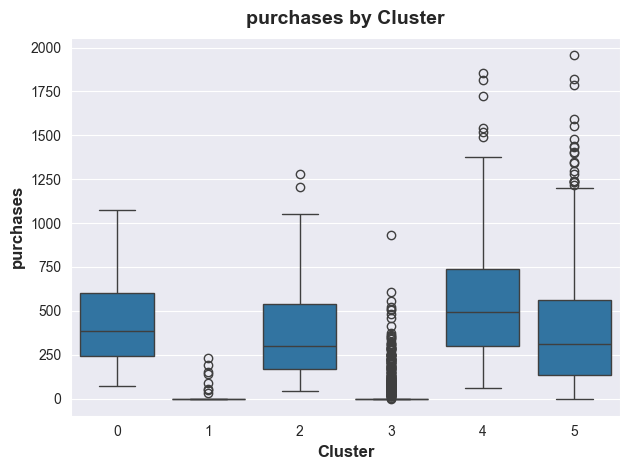

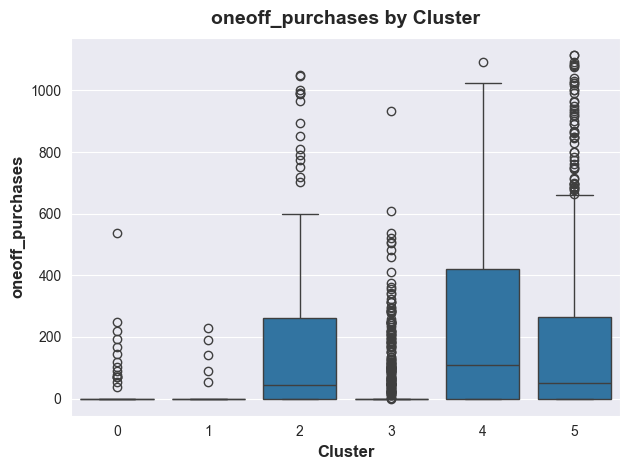

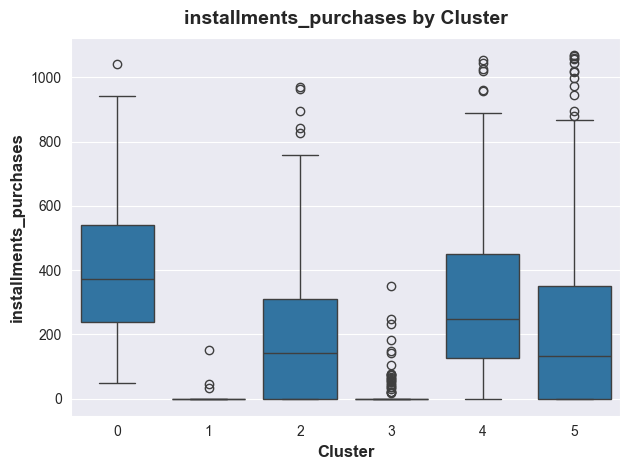

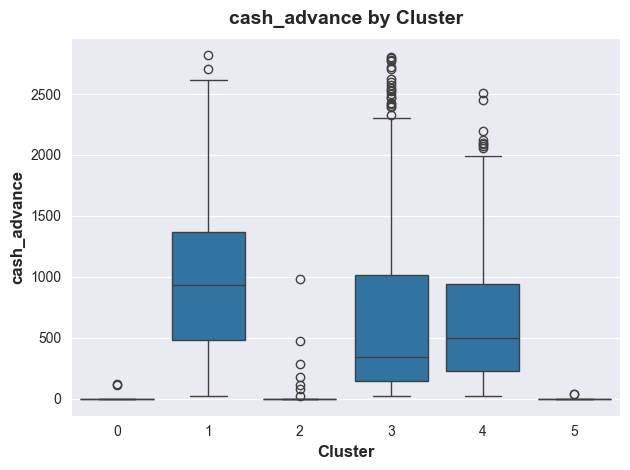

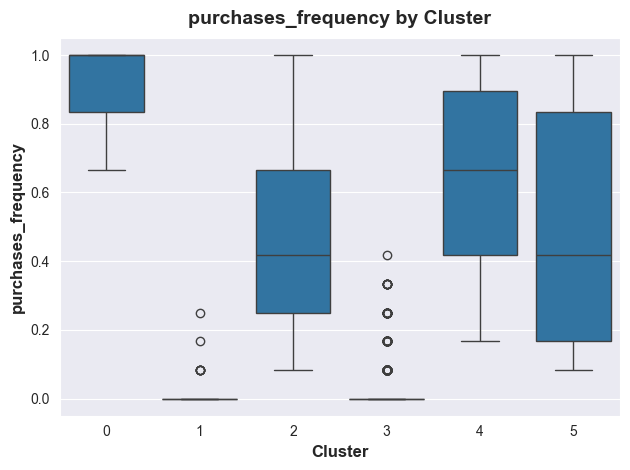

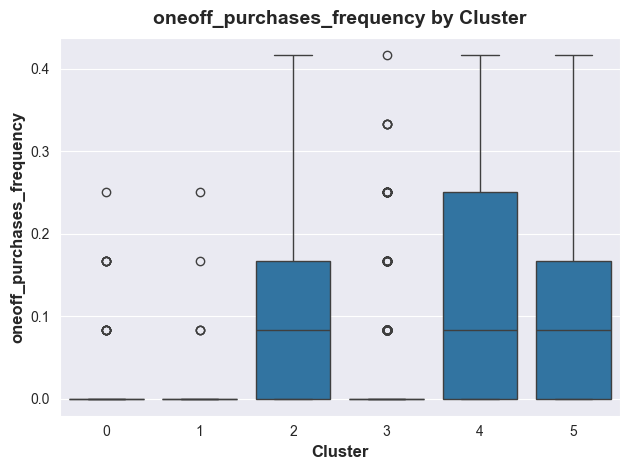

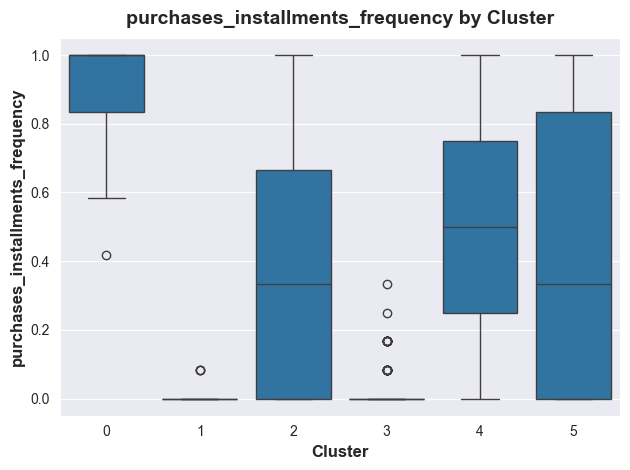

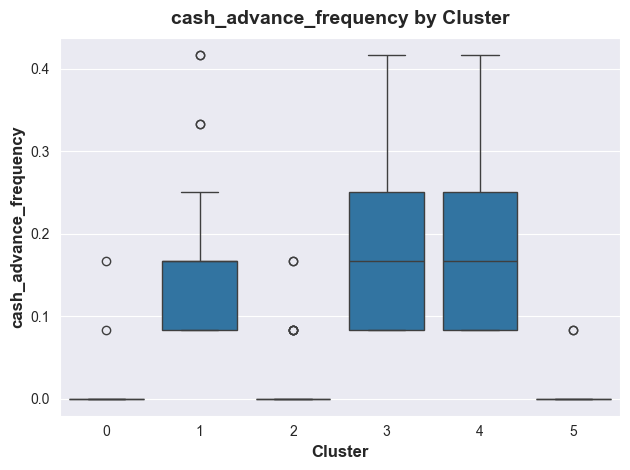

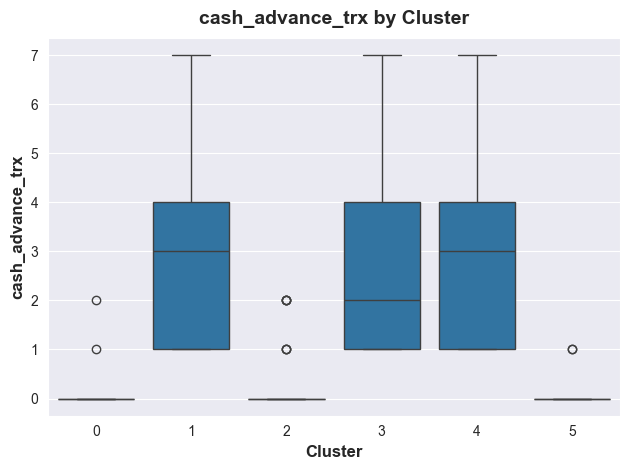

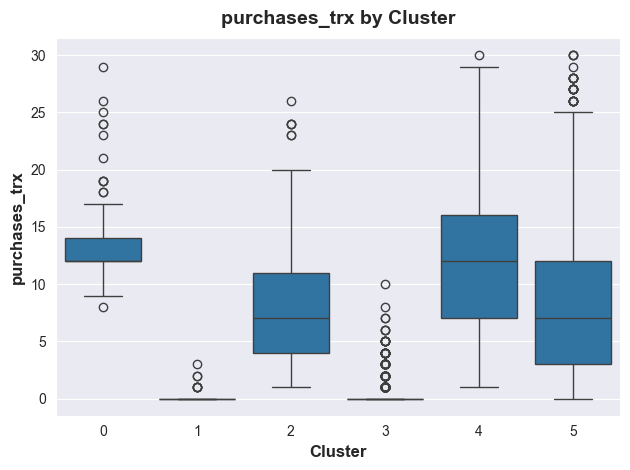

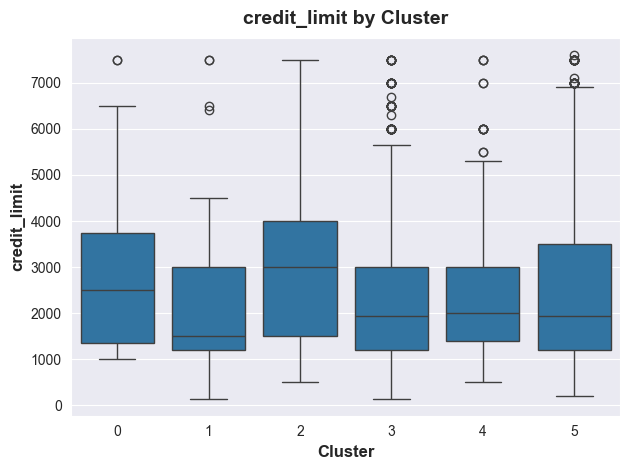

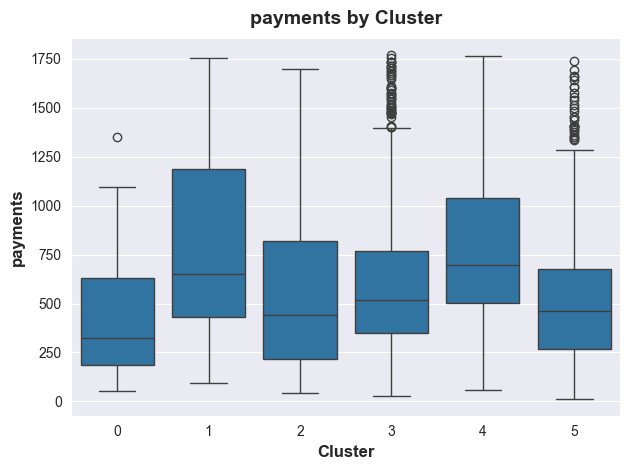

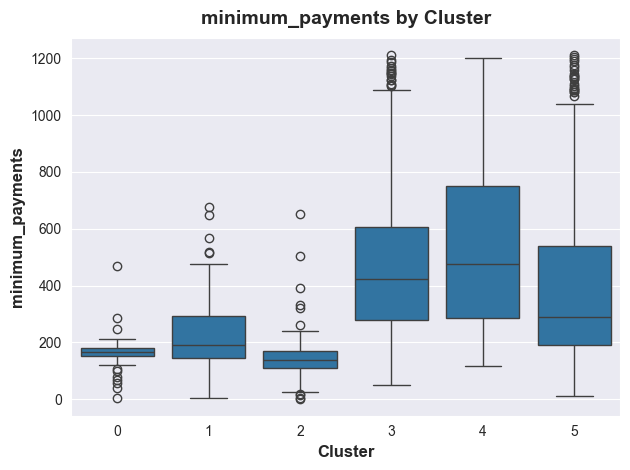

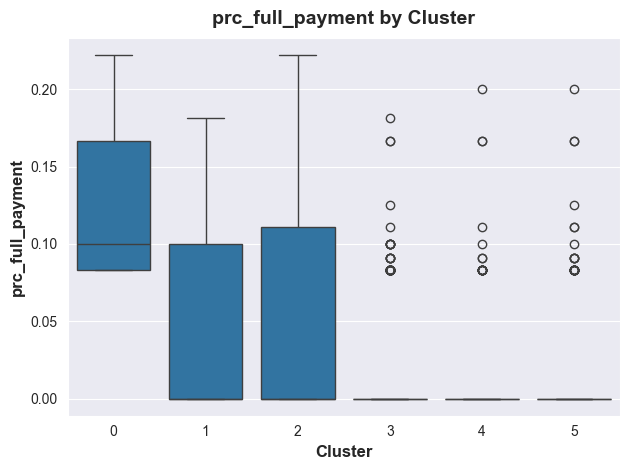

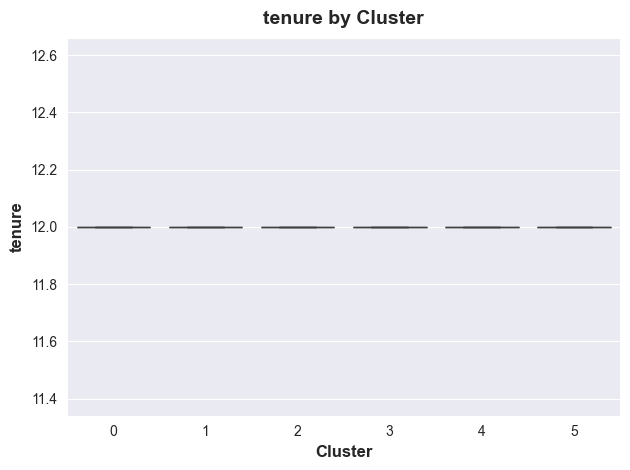

In [43]:
#Haciendo un boxplot de cada columna para cada cluster
for col in df.columns.drop('Cluster'):
    plt.figure()
    sns.boxplot(data=df, x='Cluster', y=col)
    plt.title(f'{col} by Cluster')
    plt.tight_layout()
    
plt.show()

# Análisis de Clústeres realizado con la ayuda de ChatGPT

Para analizar los clusteres extraidos le envie a ChatGPT la siguiente prompt y una imagen anexada con todos los diagramas de caja obtenidos.

>Tras realizar clustering con un dataset con el comportamiento de usuarios de tarjetas de credito, con las siguientes variables: {Nombre de cada una de las columnas del dataset y su descripción}.  Hice los siguientes diagramas de caja que muestran la distribucion de cada cluster para cada columna. Utilizalos para hacer un analisis sobre el contenido de cada cluster, asegurate de que el analisis sea lo más detallado posible

El analisis que me fue dado por ChatGPT fue este:

# Análisis de Clústeres Basado en el Comportamiento de Usuarios de Tarjetas de Crédito

A partir del análisis visual de los diagramas de caja y la descripción detallada de las variables en cada clúster, podemos realizar un análisis más profundo de cada grupo para entender mejor sus características y patrones de comportamiento. Aquí se presenta una descripción más detallada de los clústeres:

## **Clúster 0: Usuarios Inactivos o de Bajo Uso**

### Características principales:
- **Balance bajo**: La mayoría de estos usuarios tienen muy poco saldo en sus cuentas.
- **Compras muy reducidas**: Las compras de estos usuarios son casi inexistentes, lo cual puede indicar que usan sus tarjetas con poca o nula frecuencia.
- **Frecuencia de compras nula o baja**: El comportamiento de compras es esporádico, con una frecuencia de compras y compras a plazos cercana a cero.
- **Adelanto de efectivo bajo o nulo**: Estos usuarios no recurren a adelantos de efectivo.
- **Pagos bajos**: El hecho de que hagan pocos pagos podría sugerir que su uso de la tarjeta es limitado o inexistente.
- **Bajo porcentaje de pagos completos**: Si bien algunos podrían estar pagando sus saldos completamente, es poco frecuente.

### Perfil posible:
Este clúster podría incluir usuarios que apenas utilizan su tarjeta de crédito, ya sea porque la tienen como respaldo, la usan de manera esporádica o simplemente no confían en el crédito.

---

## **Clúster 1: Usuarios de Adelantos de Efectivo**

### Características principales:
- **Adelanto de efectivo elevado**: Estos usuarios recurren con mayor frecuencia a adelantos de efectivo, lo que los diferencia de otros grupos.
- **Frecuencia de compras moderada**: Aunque no tan activa como el clúster 4, este grupo tiene un comportamiento moderado de compras, con compras a plazos y compras frecuentes, aunque no sobresalientes.
- **Límites de crédito y balances medios-bajos**: Tienen un balance y límite de crédito relativamente bajos en comparación con los otros clústeres, pero aún usan sus tarjetas de manera consistente.
- **Pagos moderados**: Realizan pagos moderados, pero la distribución indica que no es común que paguen el saldo completo.

### Perfil posible:
Este clúster podría incluir a usuarios que utilizan sus tarjetas principalmente para obtener efectivo cuando lo necesitan. Tal vez recurran a sus tarjetas cuando no tienen acceso a otros métodos de financiamiento.

---

## **Clúster 2: Usuarios Disciplinados (Pagadores Completos)**

### Características principales:
- **Alta tasa de pagos completos**: La característica distintiva de este clúster es que estos usuarios son los más propensos a pagar su saldo completo, evitando así cargar intereses.
- **Frecuencia de compras alta**: Aunque no tan alta como en el clúster 4, estos usuarios realizan compras con regularidad, lo que refleja una actitud de uso responsable.
- **Límite de crédito moderado**: Tienen un límite de crédito razonable, lo cual podría estar relacionado con su comportamiento financiero disciplinado.
- **Pagos elevados**: Realizan pagos significativos, lo que respalda su tendencia a liquidar sus saldos regularmente.

### Perfil posible:
Este grupo podría estar compuesto por usuarios responsables y con buenos hábitos financieros, que prefieren pagar su saldo completo para evitar intereses. Son usuarios activos que saben cómo manejar sus finanzas de manera eficiente.

---

## **Clúster 3: Usuarios Moderados**

### Características principales:
- **Balances moderados**: Los usuarios de este clúster tienen balances intermedios, lo que sugiere que no usan su tarjeta en exceso, pero tampoco la descuidan.
- **Frecuencia de compras media**: Su comportamiento de compras es equilibrado, realizando compras frecuentes y algunas a plazos, pero no son tan activos como el clúster 4.
- **Pagos medios**: Realizan pagos regulares, lo que indica un uso moderado de sus tarjetas.
- **Uso bajo de adelantos de efectivo**: A diferencia del clúster 1, no parecen recurrir al adelanto de efectivo con frecuencia.

### Perfil posible:
Estos usuarios probablemente utilicen sus tarjetas de forma regular para compras cotidianas, sin excederse. Podrían tener un manejo financiero estable, pero sin destacar en pagos completos como el clúster 2.

---

## **Clúster 4: Usuarios de Alto Valor**

### Características principales:
- **Balance elevado**: Estos usuarios tienen los saldos más altos, lo que sugiere un uso intensivo de sus tarjetas.
- **Compras frecuentes y a plazos**: Son los que más compran, tanto en frecuencia como en volumen. Realizan compras a plazos con regularidad, lo que sugiere que pueden estar usando la tarjeta para compras grandes o para financiar gastos considerables.
- **Límite de crédito elevado**: Tienen los límites de crédito más altos, lo que podría estar relacionado con su poder adquisitivo o con la confianza que el banco deposita en ellos.
- **Pagos mínimos elevados**: Aunque realizan pagos elevados, muchos de ellos optan por realizar solo el pago mínimo, lo que podría indicar que prefieren financiar sus compras en lugar de liquidarlas de inmediato.
- **Baja tasa de pago completo**: Aunque tienen una alta actividad en cuanto a compras, son menos propensos a pagar su saldo completo, lo que podría indicar que se endeudan con mayor frecuencia.

### Perfil posible:
Este clúster podría estar compuesto por usuarios con un alto poder adquisitivo que utilizan sus tarjetas de manera intensiva para grandes compras o gastos regulares. Aunque tienen la capacidad de financiar grandes montos, su menor propensión a pagar el saldo completo podría significar que prefieren gestionar sus deudas a lo largo del tiempo, o que financian grandes compras estratégicamente.

---

## **Resumen General del Clustering:**
- **Clúster 0** representa a los usuarios menos activos, con casi nula actividad en sus tarjetas.
- **Clúster 1** se caracteriza por el uso frecuente de adelantos de efectivo, aunque con límites de crédito y balances más bajos.
- **Clúster 2** son los usuarios más disciplinados, destacándose por pagar su saldo completo y tener una alta actividad moderada.
- **Clúster 3** incluye a usuarios moderados en todos los aspectos: compras, pagos y balances.
- **Clúster 4** es el grupo de alto valor, con balances y compras elevados, pero con una menor tendencia a pagar el saldo completo.


Finalmente, para poder ver qué clientes contiene cada cluster de forma condensada le pedi que generara una tabla comparativa con su analisis por medio del siguiente prompt. 

>Haz una tabla comparativa que muestre de forma concisa las características principales de cada cluster.

ChatGPT respondio con la siguiente tabla comparativa que he formateado en Markdown para que se mire bien en el notebook.

| **Características**                     | **Clúster 0: Inactivos/Bajo Uso** | **Clúster 1: Adelantos de Efectivo** | **Clúster 2: Pagadores Completos** | **Clúster 3: Usuarios Moderados** | **Clúster 4: Alto Valor** |
|------------------------------------------|-----------------------------------|-------------------------------------|-----------------------------------|-----------------------------|----------------------------|
| **Balance (Saldo)**                      | Muy bajo                         | Medio-bajo                         | Moderado                         | Moderado                    | Alto                       |
| **Frecuencia de Compras**                | Muy baja                         | Moderada                           | Alta                             | Media                       | Muy alta                   |
| **Compras a Plazos**                     | Casi nula                        | Moderadas                          | Moderadas                        | Moderadas                   | Altas                      |
| **Adelantos de Efectivo**                | Nulos                            | Frecuentes                         | Bajos                            | Bajos                       | Bajos                      |
| **Número de Transacciones**              | Muy bajo                         | Moderado                           | Alto                             | Moderado                    | Alto                       |
| **Límite de Crédito**                    | Muy bajo                         | Medio-bajo                         | Moderado                         | Moderado                    | Alto                       |
| **Pagos Realizados**                     | Muy bajos                        | Moderados                          | Elevados                         | Moderados                   | Altos                      |
| **Pagos Mínimos**                        | Bajos                            | Moderados                          | Moderados                        | Moderados                   | Altos                      |
| **Porcentaje de Pago Completo**          | Bajo                             | Bajo                               | Alto                             | Moderado                    | Bajo                       |
| **Uso General de la Tarjeta**            | Escaso                           | Focalizado en adelantos            | Activo y disciplinado             | Moderado                    | Intenso                    |
| **Perfil General**                       | Usuarios inactivos o de bajo uso  | Usuarios que recurren a adelantos  | Usuarios responsables, pagan todo | Usuarios de uso equilibrado | Usuarios con alto poder adquisitivo y uso frecuente |



# Ideas para Campañas de Marketing Basadas en Clústeres de Usuarios

## **Clúster 0: Usuarios Inactivos/Bajo Uso**

### ¿Cómo son?
Usan muy poco su tarjeta o casi no la usan.

### Idea para la campaña:
**¡No dejes que tu tarjeta se duerma!**

Podría mostrárseles que usar la tarjeta tiene ventajas. Se les podría enviar mensajes que los animen a usar más la tarjeta, por ejemplo, ofreciendo descuentos especiales si la usan por primera vez en un mes. 

---

## **Clúster 1: Usuarios que sacan Adelantos de Efectivo**

### ¿Cómo son?
Estos usuarios sacan efectivo con la tarjeta, pero no compran mucho.

### Idea para la campaña:
**Usa tu tarjeta para más que solo efectivo**

Podría mostrárseles que, además de sacar efectivo, su tarjeta les puede dar beneficios al comprar. Tal vez podríamos ofrecer recompensas o puntos por usarla para compras, así descubrirían otros usos de la tarjeta.

---

## **Clúster 2: Pagadores Completos**

### ¿Cómo son? 
Son responsables y siempre pagan todo lo que deben.

### Idea para la campaña:
**¡Felicidades por ser tan responsable!**

Podría mostrárseles un agradecimiento por siempre pagar a tiempo. Se les podría ofrecer bonos de lealtad o un aumento en su límite de crédito. También se les podrían ofrecer más puntos o beneficios por seguir usando su tarjeta de manera tan responsable

---

## **Clúster 3: Usuarios Moderados**

### ¿Cómo son?
Usan su tarjeta de forma equilibrada, ni mucho ni poco.

### Idea para la campaña:
**¡Aprovecha más tu tarjeta!**

Podría mostrárseles que pueden aprovechar más beneficios si compran más. Se les podrían enviar ofertas que los motiven a hacer compras grandes, como descuentos especiales si gastan más de cierta cantidad. También podrían conocer cómo acumular puntos para viajes, regalos u otros beneficios.

---

## **Clúster 4: Usuarios de Alto Valor**

### ¿Cómo son? 
Son los que más usan la tarjeta y tienen balances altos.

### Idea para la campaña:
**¡Disfruta de beneficios VIP!**

Podría mostrárseles algo exclusivo para que se sientan especiales. Se les podría invitar a eventos exclusivos o darles acceso a ofertas VIP. También podrían recibir recompensas extra por cada cierto número de transacciones o por pagar más rápido.


| **Clúster**               | **Descripción**                                         | **Nombre de la Campaña**              | **Detalles de la Campaña**                                                                                      |
|---------------------------|---------------------------------------------------------|---------------------------------------|------------------------------------------------------------------------------------------------------------------|
| **Clúster 0: Inactivos**   | Usan poco o nada su tarjeta                             | ¡No dejes que tu tarjeta se duerma!   | Ofrecer descuentos especiales si la tarjeta se usa por primera vez en el mes.                                   |
| **Clúster 1: Adelantos**   | Sacan efectivo pero no compran mucho                    | Usa tu tarjeta para más que solo efectivo | Ofrecer recompensas o puntos por usar la tarjeta en compras, resaltando otros beneficios.                       |
| **Clúster 2: Pagadores**   | Pagan siempre a tiempo                                  | Felicidades por ser responsable       | Ofrecer bonos de lealtad, aumento en el límite de crédito, y más puntos por uso responsable.                    |
| **Clúster 3: Moderados**   | Uso equilibrado de la tarjeta                           | Aprovecha más tu tarjeta              | Enviar ofertas con descuentos por compras superiores a cierto monto, incentivando el uso adicional.             |
| **Clúster 4: Alto Valor**  | Usan mucho la tarjeta y tienen balances altos           | Disfruta de beneficios VIP            | Invitar a eventos exclusivos, acceso VIP, y recompensas adicionales por transacciones frecuentes o pagos rápidos.|



# Conclusiones

En el desarollo de este proyecto he llegado a las siguientes conclusiones:

1. **No hay un número objetivamente correcto de Clusters:** Si bien contamos con técnicas como el análisis del diagrama de inercia vs n_clusters o la visualización con UMAP para identificar números óptimos de clusters, siempre existirán distintas formas válidas de dividir los datos, y la elección depende principalmente del criterio de cada quien y del contexto del problema.

2. **Es posible obtener cualquier numero de clusters con cualquier algoritmo por medio del ajuste de hiperparametros**: : Al ajustar los hiperparámetros de distintos algoritmos de Clustering, parece ser posible siempre obtener el número de Clusters deseado, siempre y cuando se prueben una gran cantidad de valores diferentes.  

3. **K-Means es el algoritmo que da los Clusters más intuitivos**: Debido a la forma en que opera K-Means, este algoritmo genera los clusters que más se alinean con cómo uno dividiría los clusters manualmente al observar la visualización de los datos tras la reducción de dimensionalidad. Los otros algoritmos más complejos son capaces de encontrar patrones que son difíciles de percibir para nosotros, pero como en Clustering no hay una respuesta única correcta, quizás esa complejidad adicional no sea siempre lo más adecuado.

4. **El Clustering puede ser una herramienta muy util para el Marketing**: La segmentación de clientes mediante técnicas de clustering permite identificar grupos con características y comportamientos similares, lo que facilita la creación de estrategias de marketing personalizadas y eficientes. Esto no solo mejora la experiencia del cliente, sino que también optimiza la asignación de recursos de marketing, aumentando potencialmente el retorno de inversión en campañas publicitarias y estrategias de fidelización.



